In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
import numpy as np

In [4]:
import matplotlib
import sklearn
import statsmodels as sm

print(f'''
pandas -> {pd.__version__}
numpy -> {np.__version__}
matplotlob -> {matplotlib.__version__}
statsmodels -> {sm.__version__}
scikit-learn -> {sklearn.__version__}
''')


pandas -> 2.2.2
numpy -> 1.26.4
matplotlob -> 3.8.4
statsmodels -> 0.14.2
scikit-learn -> 1.4.2



In [5]:
def read_dataset(folder, file, date_col=None):
    '''
    folder: is a Path object
    file: the CSV filename in that Path object. 
    date_col: specify a date_col to use as index_col 
    
    returns: a pandas DataFrame with a DatetimeIndex
    '''
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df


In [6]:
tem = Path('GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv')
tem_df = pd.read_csv(tem, parse_dates=['dt'])

In [7]:
tem_df.shape

(239177, 7)

In [8]:
tem_df.head(5)

dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0 1849-01-01              26.704                          1.435  Abidjan   
1 1849-02-01              27.434                          1.362  Abidjan   
2 1849-03-01              28.101                          1.612  Abidjan   
3 1849-04-01              26.140                          1.387  Abidjan   
4 1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W

In [9]:
tem_df.drop(["AverageTemperatureUncertainty","Country", "Latitude", "Longitude"], axis=1, inplace=True)

In [10]:
tem_df.head(5)

dt  AverageTemperature     City
0 1849-01-01              26.704  Abidjan
1 1849-02-01              27.434  Abidjan
2 1849-03-01              28.101  Abidjan
3 1849-04-01              26.140  Abidjan
4 1849-05-01              25.427  Abidjan

In [11]:
tem_df.shape

(239177, 3)

In [12]:
tem_dfm = tem_df[tem_df["City"] == "Madrid"]

In [13]:
tem_dfm.shape

(3239, 3)

In [14]:
tem_dfm.head(20)

dt  AverageTemperature    City
138329 1743-11-01               6.652  Madrid
138330 1743-12-01                 NaN  Madrid
138331 1744-01-01                 NaN  Madrid
138332 1744-02-01                 NaN  Madrid
138333 1744-03-01                 NaN  Madrid
138334 1744-04-01              11.189  Madrid
138335 1744-05-01              12.241  Madrid
138336 1744-06-01              17.756  Madrid
138337 1744-07-01              20.848  Madrid
138338 1744-08-01                 NaN  Madrid
138339 1744-09-01              16.158  Madrid
138340 1744-10-01              10.549  Madrid
138341 1744-11-01               6.841  Madrid
138342 1744-12-01               3.718  Madrid
138343 1745-01-01               2.474  Madrid
138344 1745-02-01               4.241  Madrid
138345 1745-03-01               5.729  Madrid
138346 1745-04-01               9.393  Madrid
138347 1745-05-01                 NaN  Madrid
138348 1745-06-01                 NaN  Madrid

In [15]:
tem_dfm.isna().sum()

dt                     0
AverageTemperature    73
City                   0
dtype: int64

In [16]:
tem_dfm.describe()

dt  AverageTemperature
count                           3239         3166.000000
mean   1878-09-30 21:41:17.431305728           11.448704
min              1743-11-01 00:00:00           -0.918000
25%              1811-04-16 00:00:00            5.675250
50%              1878-10-01 00:00:00           10.475000
75%              1946-03-16 12:00:00           17.502000
max              2013-09-01 00:00:00           24.771000
std                              NaN            6.561506

A priori no vemos que haya ningún dato anómalo en la columna de temperatura

In [17]:
tem_dfm[tem_dfm["AverageTemperature"] == "null"]

Empty DataFrame
Columns: [dt, AverageTemperature, City]
Index: []

In [18]:
tem_dfm[tem_dfm["AverageTemperature"] == "NA"]

Empty DataFrame
Columns: [dt, AverageTemperature, City]
Index: []

In [19]:
tem_dfm[tem_dfm["AverageTemperature"] == "N/A"]

Empty DataFrame
Columns: [dt, AverageTemperature, City]
Index: []

In [20]:
tem_dfm.drop(["City"], axis=1, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_12552\2491620844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tem_dfm.drop(["City"], axis=1, inplace=True)


In [21]:
tem_dfm.head(4)

dt  AverageTemperature
138329 1743-11-01               6.652
138330 1743-12-01                 NaN
138331 1744-01-01                 NaN
138332 1744-02-01                 NaN

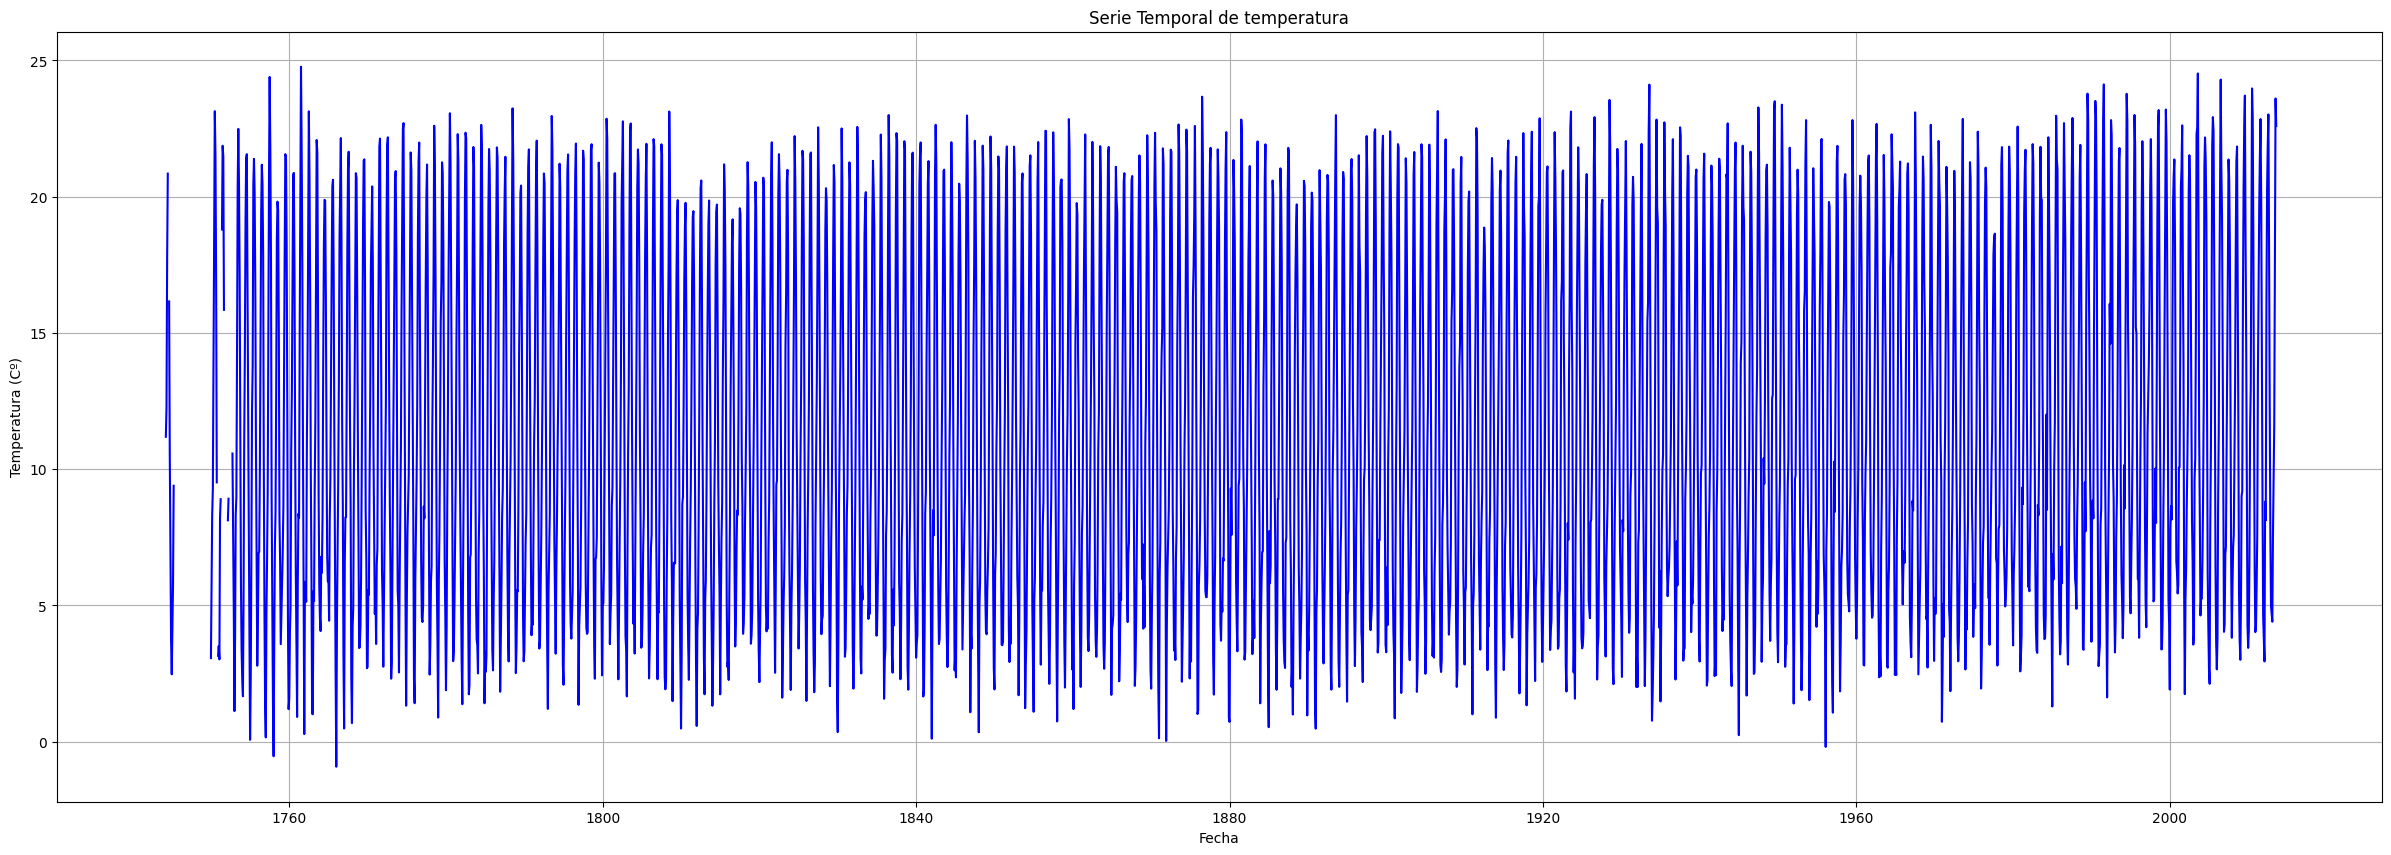

In [22]:
plt.figure(figsize=(30, 10))
plt.plot(tem_dfm.dt, tem_dfm['AverageTemperature'], color='b')
plt.title('Serie Temporal de temperatura')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (Cº)')
plt.grid(True)
plt.show()

In [23]:
tem_dfm.tail(45)

dt  AverageTemperature
141523 2010-01-01               3.443
141524 2010-02-01               4.061
141525 2010-03-01               6.672
141526 2010-04-01              11.455
141527 2010-05-01              12.979
141528 2010-06-01              18.203
141529 2010-07-01              23.974
141530 2010-08-01              22.934
141531 2010-09-01              18.323
141532 2010-10-01              11.684
141533 2010-11-01               6.327
141534 2010-12-01               4.022
141535 2011-01-01               4.232
141536 2011-02-01               5.804
141537 2011-03-01               7.579
141538 2011-04-01              13.499
141539 2011-05-01              16.440
141540 2011-06-01              19.625
141541 2011-07-01              21.490
141542 2011-08-01              22.852
141543 2011-09-01              19.865
141544 2011-10-01              14.487
141545 2011-11-01               8.841
141546 2011-12-01               4.604
141547 2012-01-01               3.753
141548 2012-02-01               2.947
141549 2012-03-01               8.808
141550 2012-04-01               8.126
141551 2012-05-01              15.943
141552 2012-06-01              20.234
141553 2012-07-01              21.831
141554 2012-08-01              23.021
141555 2012-09-01              18.204
141556 2012-10-01              12.509
141557 2012-11-01               7.610
141558 2012-12-01               4.972
141559 2013-01-01               4.691
141560 2013-02-01               4.403
141561 2013-03-01               7.504
141562 2013-04-01               9.483
141563 2013-05-01              11.629
141564 2013-06-01              17.565
141565 2013-07-01              23.605
141566 2013-08-01              22.599
141567 2013-09-01                 NaN

In [24]:
extract = tem_dfm.tail(45)

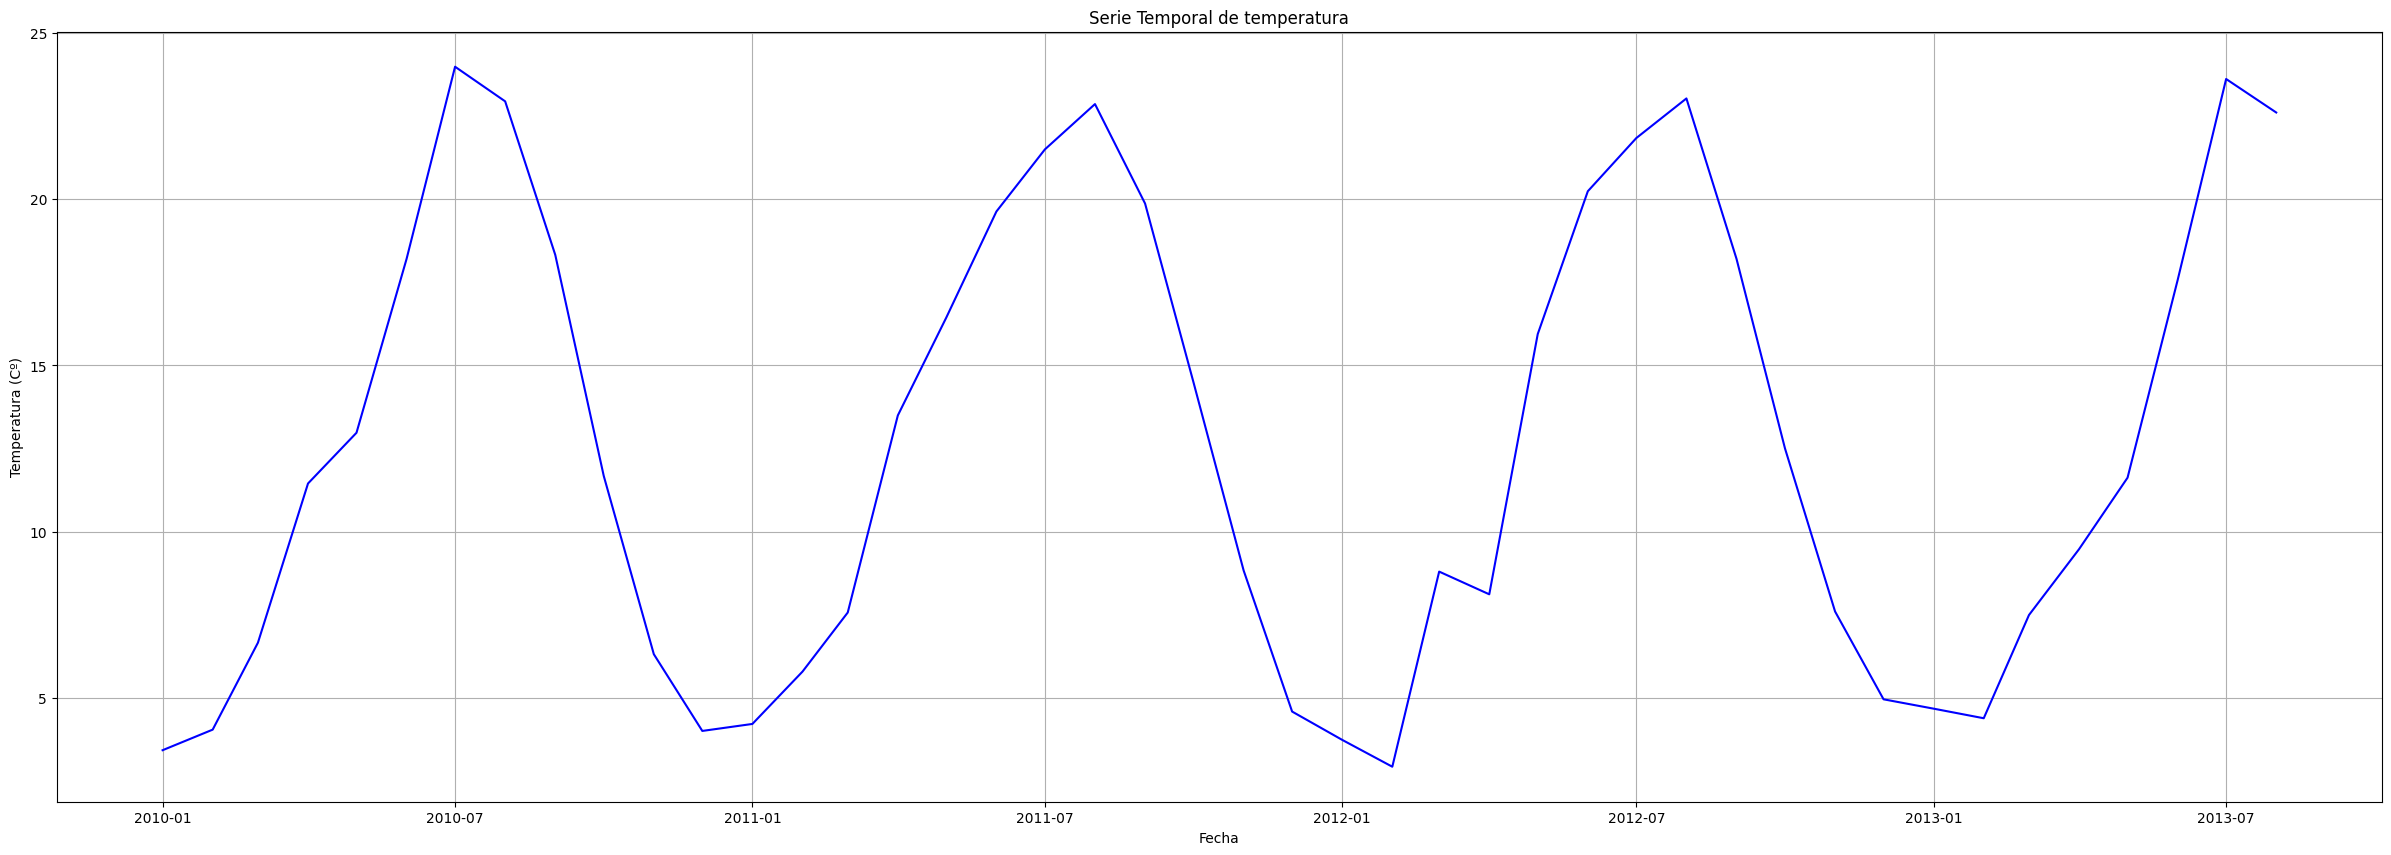

In [25]:
plt.figure(figsize=(30, 10))
plt.plot(extract.dt, extract['AverageTemperature'], color='b')
plt.title('Serie Temporal de temperatura')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (Cº)')
plt.grid(True)
plt.show()

Como vemos que existe estacionalidad, vamos a sustituir los valores ausentes por lo valores del siguiente año, de este modo tendremos cierta coherencia, ya que hay varios valores ausentes de seguido y no sería tan correcto imputar los valores anteriores o posteriores.

In [26]:
# Reseteamos los valores del índice
tem_dfm = tem_dfm.reset_index(drop=True)

In [27]:
tem_dfm.head(16)

dt  AverageTemperature
0  1743-11-01               6.652
1  1743-12-01                 NaN
2  1744-01-01                 NaN
3  1744-02-01                 NaN
4  1744-03-01                 NaN
5  1744-04-01              11.189
6  1744-05-01              12.241
7  1744-06-01              17.756
8  1744-07-01              20.848
9  1744-08-01                 NaN
10 1744-09-01              16.158
11 1744-10-01              10.549
12 1744-11-01               6.841
13 1744-12-01               3.718
14 1745-01-01               2.474
15 1745-02-01               4.241

In [28]:
tem_dfm.iloc[17:77]

dt  AverageTemperature
17 1745-04-01               9.393
18 1745-05-01                 NaN
19 1745-06-01                 NaN
20 1745-07-01                 NaN
21 1745-08-01                 NaN
22 1745-09-01                 NaN
23 1745-10-01                 NaN
24 1745-11-01                 NaN
25 1745-12-01                 NaN
26 1746-01-01                 NaN
27 1746-02-01                 NaN
28 1746-03-01                 NaN
29 1746-04-01                 NaN
30 1746-05-01                 NaN
31 1746-06-01                 NaN
32 1746-07-01                 NaN
33 1746-08-01                 NaN
34 1746-09-01                 NaN
35 1746-10-01                 NaN
36 1746-11-01                 NaN
37 1746-12-01                 NaN
38 1747-01-01                 NaN
39 1747-02-01                 NaN
40 1747-03-01                 NaN
41 1747-04-01                 NaN
42 1747-05-01                 NaN
43 1747-06-01                 NaN
44 1747-07-01                 NaN
45 1747-08-01                 NaN
46 1747-09-01                 NaN
47 1747-10-01                 NaN
48 1747-11-01                 NaN
49 1747-12-01                 NaN
50 1748-01-01                 NaN
51 1748-02-01                 NaN
52 1748-03-01                 NaN
53 1748-04-01                 NaN
54 1748-05-01                 NaN
55 1748-06-01                 NaN
56 1748-07-01                 NaN
57 1748-08-01                 NaN
58 1748-09-01                 NaN
59 1748-10-01                 NaN
60 1748-11-01                 NaN
61 1748-12-01                 NaN
62 1749-01-01                 NaN
63 1749-02-01                 NaN
64 1749-03-01                 NaN
65 1749-04-01                 NaN
66 1749-05-01                 NaN
67 1749-06-01                 NaN
68 1749-07-01                 NaN
69 1749-08-01                 NaN
70 1749-09-01                 NaN
71 1749-10-01                 NaN
72 1749-11-01                 NaN
73 1749-12-01                 NaN
74 1750-01-01               3.069
75 1750-02-01               5.838
76 1750-03-01               8.308

In [29]:
tem_dfm.iloc[:74].isna().sum()

dt                     0
AverageTemperature    61
dtype: int64

Vemos que los dos primeros años tenemos algunos datos, pero después tenemos 4 años sin ningún dato, de hecho, de los 76 datos ausentes, 61 son de este periodo, por tanto merece la pena deshacerse de este periodo, que además es el incial, que imputar datos cuando no sería representativos.

In [30]:
tem_dfm = tem_dfm.iloc[74:]

In [31]:
tem_dfm.iloc[:50]

dt  AverageTemperature
74  1750-01-01               3.069
75  1750-02-01               5.838
76  1750-03-01               8.308
77  1750-04-01               9.278
78  1750-05-01              13.643
79  1750-06-01              17.747
80  1750-07-01              23.140
81  1750-08-01              21.490
82  1750-09-01              16.956
83  1750-10-01               9.517
84  1750-11-01                 NaN
85  1750-12-01               3.152
86  1751-01-01               3.512
87  1751-02-01               3.022
88  1751-03-01               8.218
89  1751-04-01               8.900
90  1751-05-01                 NaN
91  1751-06-01              18.801
92  1751-07-01              21.870
93  1751-08-01              21.474
94  1751-09-01              15.848
95  1751-10-01                 NaN
96  1751-11-01                 NaN
97  1751-12-01                 NaN
98  1752-01-01               2.024
99  1752-02-01                 NaN
100 1752-03-01               8.124
101 1752-04-01               8.917
102 1752-05-01                 NaN
103 1752-06-01                 NaN
104 1752-07-01                 NaN
105 1752-08-01                 NaN
106 1752-09-01                 NaN
107 1752-10-01              10.577
108 1752-11-01               7.891
109 1752-12-01               4.906
110 1753-01-01               1.123
111 1753-02-01               3.869
112 1753-03-01               8.308
113 1753-04-01               8.977
114 1753-05-01              13.994
115 1753-06-01              20.319
116 1753-07-01              22.490
117 1753-08-01              20.508
118 1753-09-01              17.200
119 1753-10-01              11.621
120 1753-11-01               5.799
121 1753-12-01               3.375
122 1754-01-01               2.267
123 1754-02-01               1.668

In [32]:
tem_dfm.isna().sum()

dt                     0
AverageTemperature    12
dtype: int64

Ahora podemos imputar los valores ausentes restantes, que están repartidos de forma más variada.

In [33]:
# Reseteamos los valores del índice
tem_dfm = tem_dfm.reset_index(drop=True)

In [34]:
# Creamos una columna nueva con las fechas del siguiente año
tem_dfm['siguiente_año'] = tem_dfm['dt'] + pd.DateOffset(years=1)

In [35]:
# Creamos una serie temporal que contenga los valores del siguiente año
valores_siguiente_año = tem_dfm.set_index('dt')['AverageTemperature'].reindex(tem_dfm['siguiente_año']).reset_index(drop=True)


In [36]:
valores_siguiente_año.head(10)

0     3.512
1     3.022
2     8.218
3     8.900
4       NaN
5    18.801
6    21.870
7    21.474
8    15.848
9       NaN
Name: AverageTemperature, dtype: float64

In [37]:
# Sustituimos los valores ausentes por los valores correspondientes del siguiente año
tem_dfm.loc[tem_dfm['AverageTemperature'].isna(), 'AverageTemperature'] = valores_siguiente_año[tem_dfm['AverageTemperature'].isna()].values

In [38]:
# Finalmente, eliminamos la columna 'siguiente_ano'
tem_dfm.drop(columns=['siguiente_año'], inplace=True)

In [39]:
tem_dfm.head(5)

dt  AverageTemperature
0 1750-01-01               3.069
1 1750-02-01               5.838
2 1750-03-01               8.308
3 1750-04-01               9.278
4 1750-05-01              13.643

In [40]:
tem_dfm.isna().sum()

dt                    0
AverageTemperature    3
dtype: int64

Como aún tenemos valores ausentes, por la coincidencia de valores ausentes en el mismo mes del siguiente año, o por los valores ausentes del último año, vamos a utilizar la imputación ffill, para rellenar los valores ausentes con el dato anterior, esto al menos no será tan incorrecto como imputar la totalidad de valores ausentes con el dato anterior. 


In [41]:
tem_dfm = tem_dfm.fillna(method='ffill')

C:\Users\PC\AppData\Local\Temp\ipykernel_12552\2331316223.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tem_dfm = tem_dfm.fillna(method='ffill')


In [42]:
tem_dfm.isna().sum()

dt                    0
AverageTemperature    0
dtype: int64

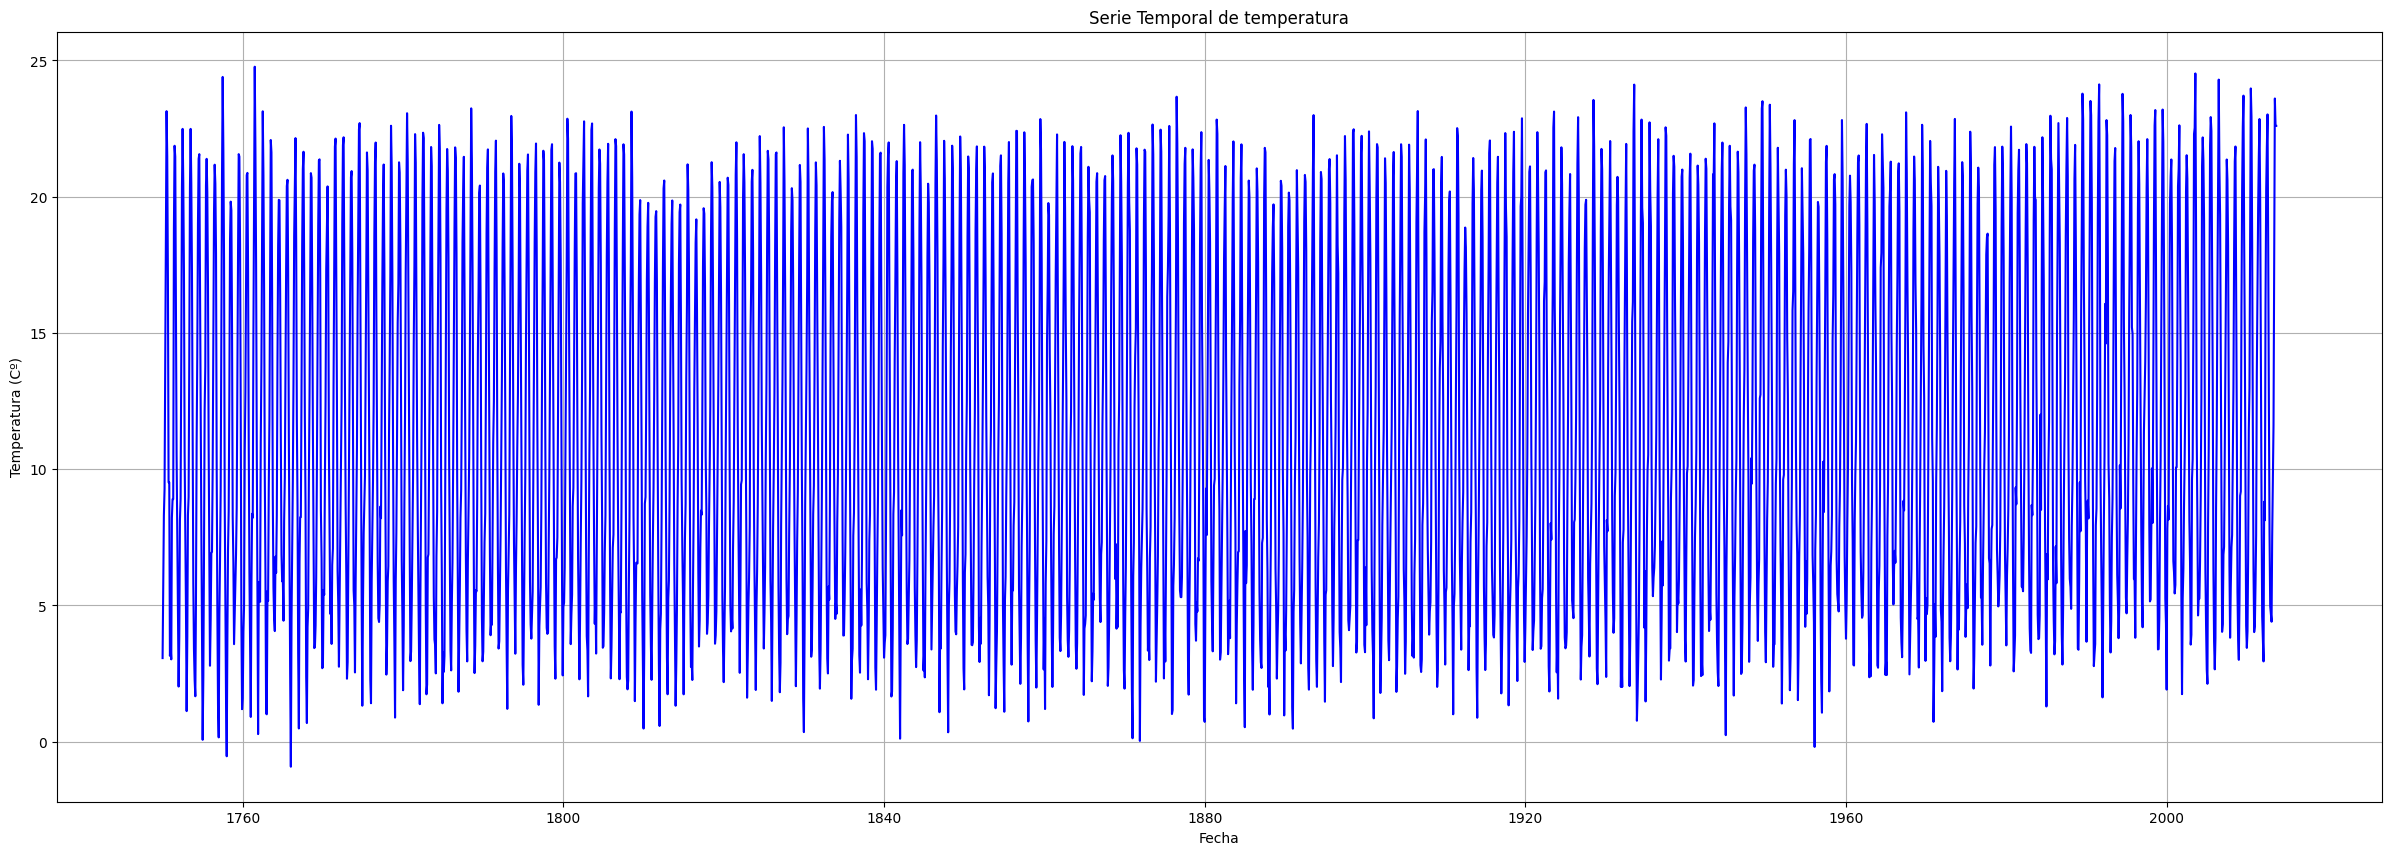

In [43]:
plt.figure(figsize=(30, 10))
plt.plot(tem_dfm.dt, tem_dfm['AverageTemperature'], color='b')
plt.title('Serie Temporal de temperatura')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (Cº)')
plt.grid(True)
plt.show()

In [44]:
tem_dfm.tail(4)

dt  AverageTemperature
3161 2013-06-01              17.565
3162 2013-07-01              23.605
3163 2013-08-01              22.599
3164 2013-09-01              22.599

In [45]:
tem_dfm['dt'] = pd.to_datetime(tem_dfm['dt'])

# Configurar el índice del DataFrame como la columna de fechas
tem_dfm.set_index('dt', inplace=True)

In [46]:
tem_dfm.tail(4)

AverageTemperature
dt                            
2013-06-01              17.565
2013-07-01              23.605
2013-08-01              22.599
2013-09-01              22.599

In [209]:
tem_dfm.to_csv("tem_dfm.csv")

Ya después de limpiar los datos ausentes, vamos a comprobar que no hay valores anómalos de forma empírica para poder seguir con el análisis exploratorio.

In [47]:
import seaborn as sns
sns.__version__

'0.13.2'

<Axes: ylabel='Count'>

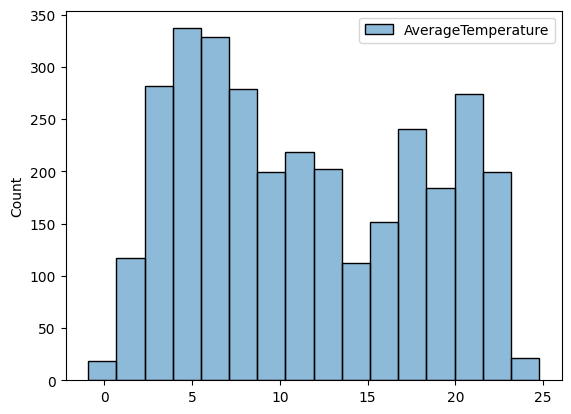

In [48]:
sns.histplot(tem_dfm)

A simple vista no vemos que hayan posibles outliers tanto por la izquierda como por la derecha

<Axes: ylabel='AverageTemperature'>

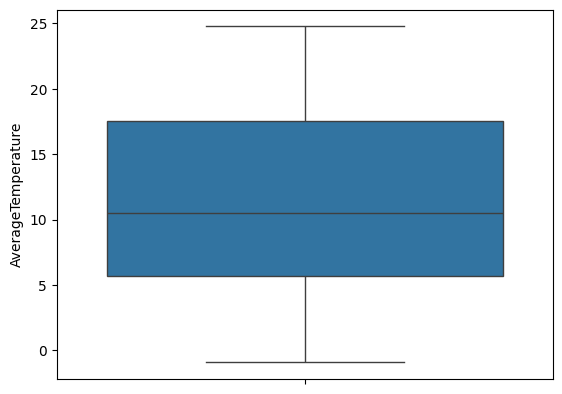

In [49]:
sns.boxplot(tem_dfm['AverageTemperature'], whis=1.5)

Tampoco se reflejan en el gráfico de caja y bigotes

Vamos a usar el Tukey's method, que dice que los valores por encima y por debajo de 1.5 del IQR 

In [50]:
percentiles = [0, 5, 10, 25, 50, 75, 90, 95, 100]
np.percentile(tem_dfm, percentiles)

array([-0.918 ,  2.5054,  3.4284,  5.679 , 10.483 , 17.515 , 21.0238,
       21.8818, 24.771 ])

In [51]:
def iqr_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    IQR = q3 - q1
    lower_fence = q1 - (1.0 * IQR)
    upper_fence = q3 + (1.0 * IQR)
    return data[(data.values > upper_fence) | (data.values < lower_fence)]

In [52]:
outliers = iqr_outliers(tem_dfm)
print(outliers)

Empty DataFrame
Columns: [AverageTemperature]
Index: []


In [53]:
tem_dfm.values

array([[ 3.069],
       [ 5.838],
       [ 8.308],
       ...,
       [23.605],
       [22.599],
       [22.599]])

Vemos que no indica ningún outlier con este método. Vamos a comprobar con el método de z-socre, donde se consideran outliers las observaciones más lejanas de x (degree=3) desviaciones estándar

In [54]:
data = tem_dfm.copy()
data['zscore'] = (data - data.mean())/data.std()
outliers = data[(data['zscore'] <= -2) | (data['zscore'] >= 2)]

In [55]:
def zscore(df, degree=3):
    data = df.copy()
    data['zscore'] = (data - data.mean())/data.std()
    outliers = data[(data['zscore'] <= -degree) | (data['zscore'] >= degree)]
    
    return outliers, data

In [56]:
threshold = 2.5
outliers, transformed = zscore(tem_dfm, threshold)

In [57]:
print(outliers)

Empty DataFrame
Columns: [AverageTemperature, zscore]
Index: []


In [58]:
threshold = 2
outliers, transformed = zscore(tem_dfm, threshold)

In [59]:
print(outliers)

            AverageTemperature    zscore
dt                                      
1761-07-01              24.771  2.026741


In [60]:
def plot_zscore(data, d=3):
    n = len(data)
    plt.figure(figsize=(8,8))
    plt.plot(data,'k^')
    plt.plot([0,n],[d,d],'r--')
    plt.plot([0,n],[-d,-d],'r--')

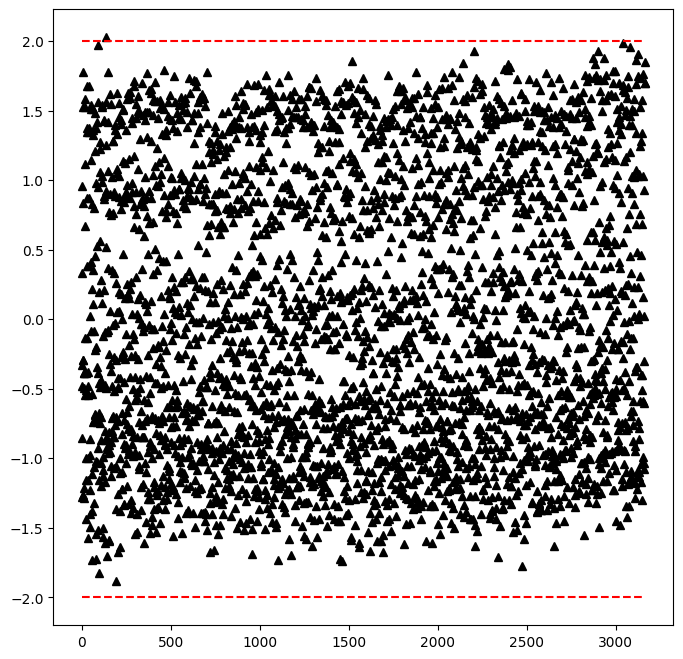

In [61]:
data = transformed['zscore'].values
plot_zscore(data, d=2)

Vemos que tan solo con degree=2 comienza a visualizarse un outlier. Pero no vamos a considerar que ese punto como outlier. Este conjunto de datos no tiene puntos anómalos.

Una vez comprobado y tratado los valores ausentes y los outliers, vamos a realizar un análisis descriptivo. Ya hemos análizado las medidas de tendencia central, ahora vamos a descomponer la serie temporal para analizar la estacionalidad y tendencia.

In [62]:
import pandas as pd
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import matplotlib.pyplot as plt

In [63]:
tem_decomposed = seasonal_decompose(tem_dfm,model='additive') 

Utilizamos el modelo aditivo ya que viendo la gráfica se aprecia que la tendencia es independiente de la estacionalidad.

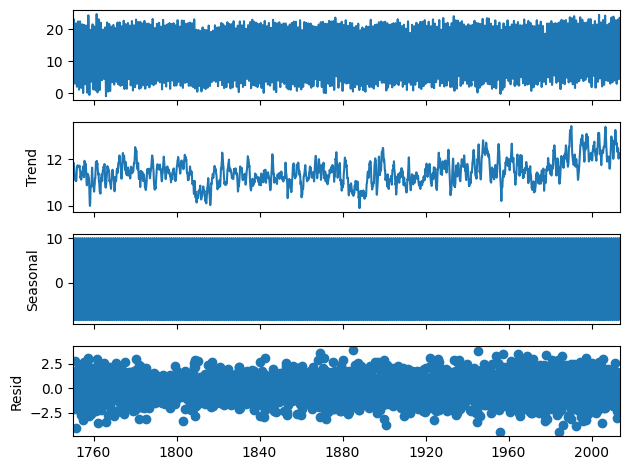

In [64]:
plot = tem_decomposed.plot()
#plt.savefig('images/fig_9.15.png', bbox_inches='tight')

A simple vista vemos que no hay ni estacionalidad, ni tendencia. Aunque tratándose de temperatura por meses, lo más seguro es que exista estacionalidad aunque al ser tan densa la gráfica no se aprecia. Vamos a comprobar extrayendo una parte de los datos y volviendo a descomponerlo.

In [65]:
tem_dfm.shape

(3165, 1)

In [66]:
extract = tem_dfm.iloc[3000:3200]

In [67]:
extract.shape

(165, 1)

In [68]:
extract_decomposed = seasonal_decompose(extract,model='additive') 

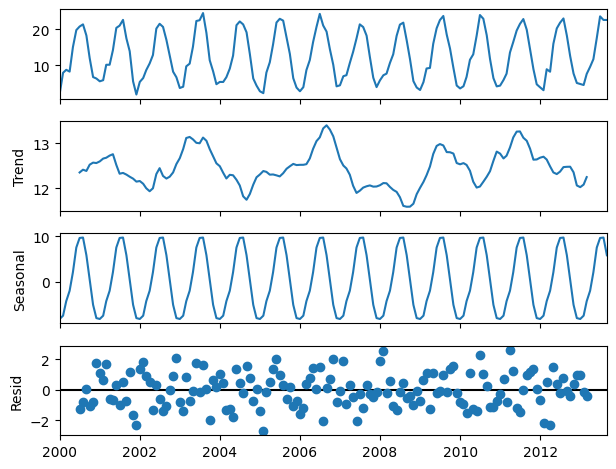

In [69]:
plot = extract_decomposed.plot()

Aquí efectivamente vemos que existe estacionalidad, cada año suben las temperaturas a mitad de año y bajan a principios y finales de cada año. Sin embargo, en los datos completos vemos que no hay una tenedencia clara. 

Lo siguiente será comprobar que es estacionaria, es decir, media y varianza constantes a lo largo del tiempo.

Una posible confirmación de que no es estacionaria es a través del histograma.

<Axes: ylabel='Frequency'>

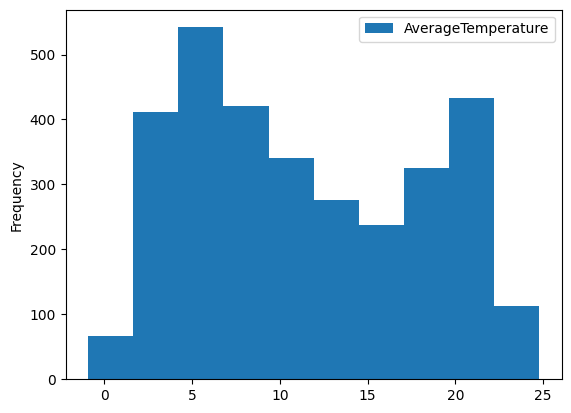

In [70]:
tem_dfm.plot(kind='hist')

No sigue exactamente una distribución normal. Aunque por la gráfica original, parece que tiene media y varianza constante. Debemos comprobarlo por contraste de hipótesis, en concreto, adfuller y kpss: 

Adfuller: si el p-value es inferior a 0.05: hipótesis nula rechazada > no existe raíz unitaria = probablemente estacionaria 

Kpss: si el p-value es inferior a 0.05: hipótesis nula rechazada > probabilidad de que sea estacionaria es muy baja.

In [71]:
# use this instead 
def print_results(output, test='adf'):
    
    pval = output[1]
    test_score = output[0]
    lags = output[2]
    
    decision = 'Non-Stationary'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Stationary'
    elif test=='kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Stationary'
            
    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Numbers of lags': lags,
    'decision': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value
       
    return pd.Series(output_dict, name=test)

In [72]:
from statsmodels.tsa.stattools import adfuller, kpss

adf_output = adfuller(tem_dfm)
kpss_output = kpss(tem_dfm)

C:\Users\PC\AppData\Local\Temp\ipykernel_12552\2834859942.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_output = kpss(tem_dfm)


In [73]:
pd.concat([
print_results(adf_output, 'adf'),
print_results(kpss_output, 'kpss')
], axis=1)

adf            kpss
Test Statistic          -5.617367        1.380494
p-value                  0.000001            0.01
Numbers of lags                26              69
decision               Stationary  Non-Stationary
Critical Value (1%)     -3.432436           0.739
Critical Value (5%)     -2.862461           0.463
Critical Value (10%)    -2.567261           0.347
Critical Value (2.5%)         NaN           0.574

Ls resultados de los test no son para nada coherentes, esto puede ser debido a longitud de la serie temporal. En cualquier caso, al ser estacional, no cumple en términos teóricos con la estacionariedad.

Para eliminar el componente estacional vamos a comprobar los siguientes métodos.

In [74]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# using first order differencing (detrending)
first_ord_diff = tem_dfm.diff(12).dropna()

# using second order differencing
second_ord_diff = tem_dfm.diff(12).diff().dropna()

# differencing to remove seasonality
diseasonalize = tem_dfm.diff(52).dropna()

# using rolling mean 
rolling_mean = tem_dfm.rolling(window=52).mean()
subt_roll_mean = tem_dfm - rolling_mean

# log transform
log_transform = np.log(tem_dfm)

# Square root transform
square_root = np.sqrt(tem_dfm)

# using seasonal_decompose to remove trend
decomp = seasonal_decompose(tem_dfm)
sd_detrend = (decomp.observed - decomp.trend)

# using hp_filter 
cyclic_extract, trend = hpfilter(tem_dfm)

# combine the methods into a list
methods = [first_ord_diff, second_ord_diff, 
           diseasonalize, subt_roll_mean, 
           log_transform, square_root,
           sd_detrend, cyclic_extract]

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


In [75]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
# plt.rc('font', size=8)                     ## 
# plt.rc('axes', titlesize=10)               ## 
# plt.rc('axes', labelsize=12)               ##
# plt.rc('xtick', labelsize=10)              ##
# plt.rc('ytick', labelsize=10)              ##
# plt.rc('legend', fontsize=10)              ##
# plt.rc('figure', titlesize=10)             ## 
#############################################

In [76]:
def check_stationarity(df):
    results = adfuller(df)[1:3]
    s = 'Non-Stationary'
    if results[0] < 0.05:
        s = 'Stationary'
    print(f"'{s}\t p-value:{results[0]} \t lags:{results[1]}")
    return (s, results[0])

In [77]:
def plot_comparison(methods, plot_type='line'):
    n = len(methods) // 2
    fig, ax = plt.subplots(n,2, sharex=True, figsize=(20,10))
    for i, method in enumerate(methods):
        method.dropna(inplace=True)
        name = [n for n in globals() if globals()[n] is method]
        v, r = i // 2, i % 2

        kpss_s, adf_s = check_stationarity(method)

        method.plot(kind=plot_type, 
                    ax=ax[v,r], 
                    legend=False, 
                    title=f'{name[0].upper()} KPSS={kpss_s}, ADF={adf_s}')
        ax[v,r].title.set_size(14)
        method.rolling(52).mean().plot(ax=ax[v,r], legend=False)
        

In [78]:
import warnings
warnings.filterwarnings('ignore')

'Stationary	 p-value:2.359650715154532e-30 	 lags:24
'Stationary	 p-value:0.0 	 lags:29
'Stationary	 p-value:2.4113873411172274e-16 	 lags:27
'Stationary	 p-value:3.628514031685801e-19 	 lags:28
'Stationary	 p-value:1.328535485450916e-10 	 lags:25
'Stationary	 p-value:1.6271263873054694e-08 	 lags:25
'Stationary	 p-value:0.0 	 lags:26
'Stationary	 p-value:0.0 	 lags:29


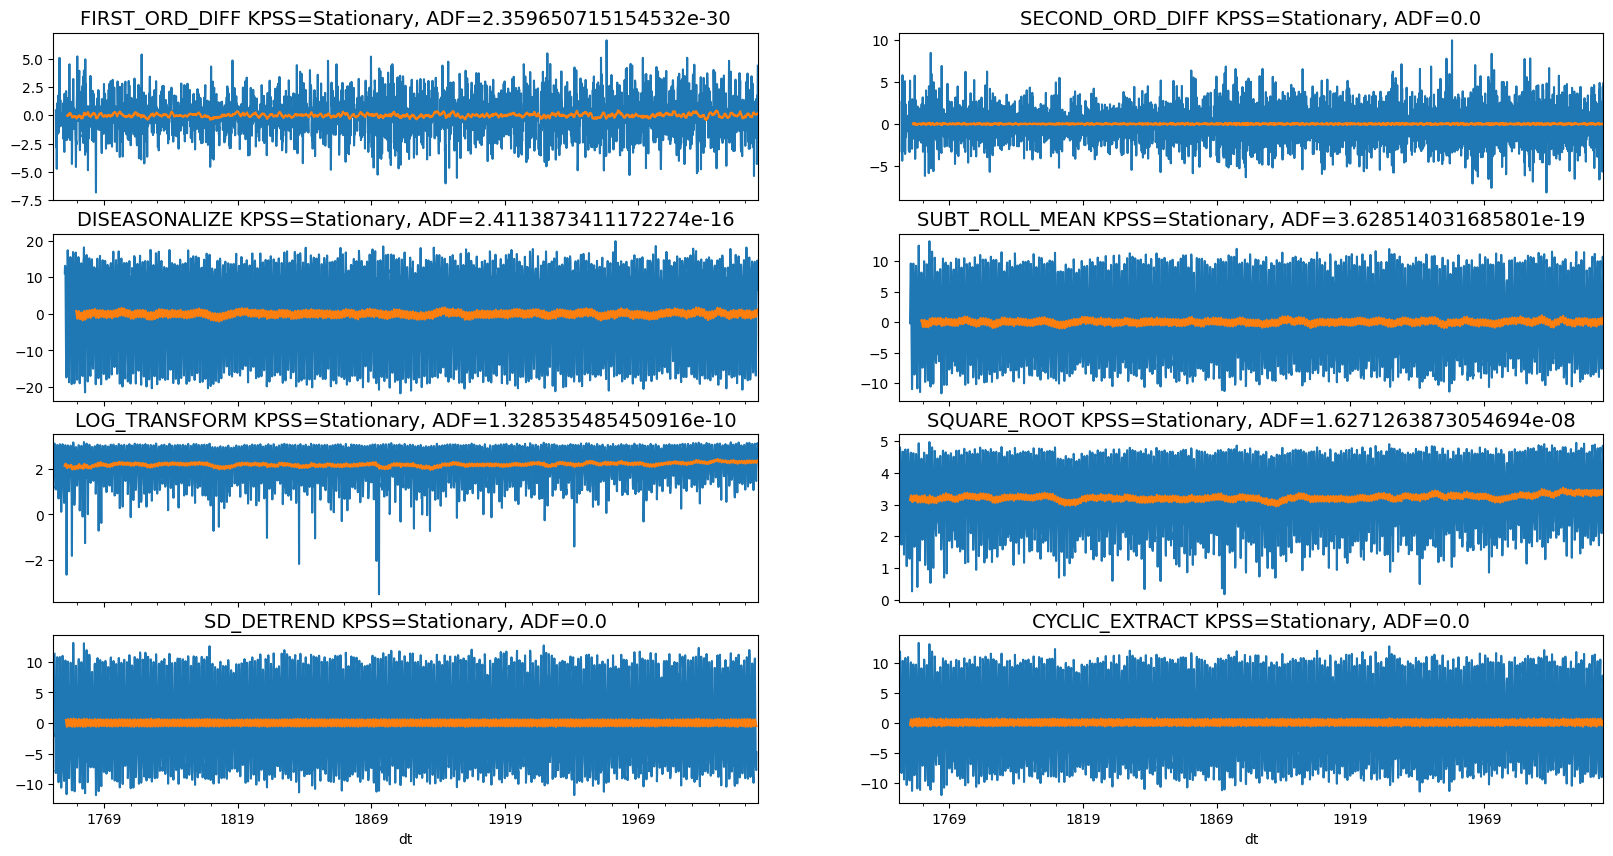

In [79]:
plot = plot_comparison(methods)
warnings.simplefilter(action='ignore')
#plt.savefig('images/fig_9.20.png', bbox_inches='tight')

Vemos que la mayoría de ellos funciona, pero el que produce menos fluctuaciones en la varianza es la diferenciación de primer y segundo orden. Como por cada diferenciación perdemos más información, vamos a comprobar también para modelizar la serie con diferenciación de grado 1, ya que ambas hipótesis indican que es estacionaria.

Por último, vamos a comprobar si los datos cumplen con los supuestos de normalidad y homocedasticidad que a priori son requisitos para los modelos estadísticos.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, boxcox
from statsmodels.stats.api import (het_breuschpagan, 
                                   het_goldfeldquandt, 
                                   het_white, jarque_bera,
                                   omni_normtest, normal_ad)
from statsmodels.stats.diagnostic import kstest_normal, normal_ad
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.formula.api import ols
from statsmodels.tools.tools import add_constant

In [81]:
from scipy.stats import shapiro, kstest, normaltest
from statsmodels.stats.diagnostic import kstest_normal, normal_ad

In [82]:
def is_normal(test, p_level=0.05):
    stat, pval = test
    return 'Normal' if pval > 0.05 else 'Not Normal'

In [83]:
print(is_normal(shapiro(first_ord_diff)))
print(is_normal(normaltest(first_ord_diff)))
print(is_normal(normal_ad(first_ord_diff)))
print(is_normal(kstest_normal(first_ord_diff)))

Normal
Normal
Normal
Not Normal


<Axes: ylabel='Frequency'>

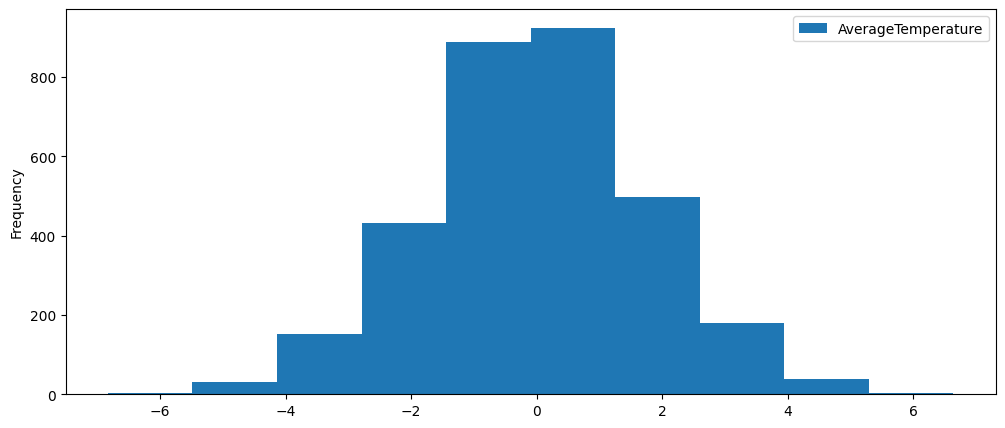

In [84]:
first_ord_diff.plot(kind='hist')

In [85]:
# from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(first_ord_diff.dropna(), lags=1, trend='n').fit()

In [86]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:     AverageTemperature   No. Observations:                 3153
Model:                     AutoReg(1)   Log Likelihood               -6193.373
Method:               Conditional MLE   S.D. of innovations              1.726
Date:                Mon, 29 Apr 2024   AIC                          12390.747
Time:                        13:28:45   BIC                          12402.858
Sample:                    02-01-1751   HQIC                         12395.092
                         - 09-01-2013                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
AverageTemperature.L1     0.1868      0.018     10.666      0.000       0.152       0.221
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.3525           +0.0000j            5.3525            0.0000
-----------------------------------------------------------------------------
"""

In [87]:
model2 = AutoReg(second_ord_diff.dropna(), lags=1, trend='n').fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:     AverageTemperature   No. Observations:                 3152
Model:                     AutoReg(1)   Log Likelihood               -6718.763
Method:               Conditional MLE   S.D. of innovations              2.041
Date:                Mon, 29 Apr 2024   AIC                          13441.526
Time:                        13:28:46   BIC                          13453.637
Sample:                    03-01-1751   HQIC                         13445.872
                         - 09-01-2013                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
AverageTemperature.L1    -0.4121      0.016    -25.377      0.000      -0.444      -0.380
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.4266           +0.0000j            2.4266            0.5000
-----------------------------------------------------------------------------
"""

Parece que según los criterios de AIC, BIC y HQIC el mejor modelo es con diferenciación de primer orden.

In [88]:
print(is_normal(shapiro(model.resid)))
print(is_normal(normaltest(model.resid)))
print(is_normal(normal_ad(model.resid)))
print(is_normal(kstest_normal(model.resid)))


Normal
Normal
Not Normal
Not Normal


(array([1.000e+01, 6.100e+01, 2.690e+02, 6.190e+02, 1.007e+03, 7.770e+02,
        3.050e+02, 8.800e+01, 1.500e+01, 1.000e+00]),
 array([-6.20271081, -4.8564307 , -3.51015059, -2.16387047, -0.81759036,
         0.52868975,  1.87496987,  3.22124998,  4.56753009,  5.91381021,
         7.26009032]),
 <BarContainer object of 10 artists>)

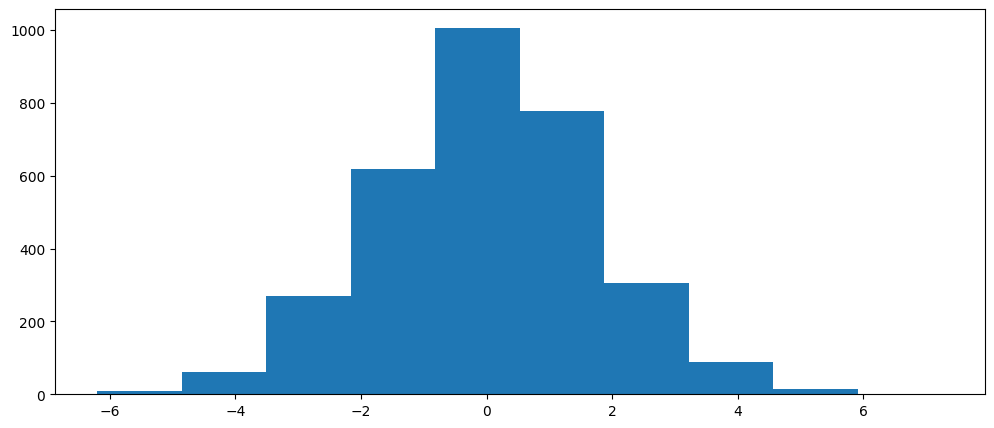

In [89]:
plt.hist(model.resid)

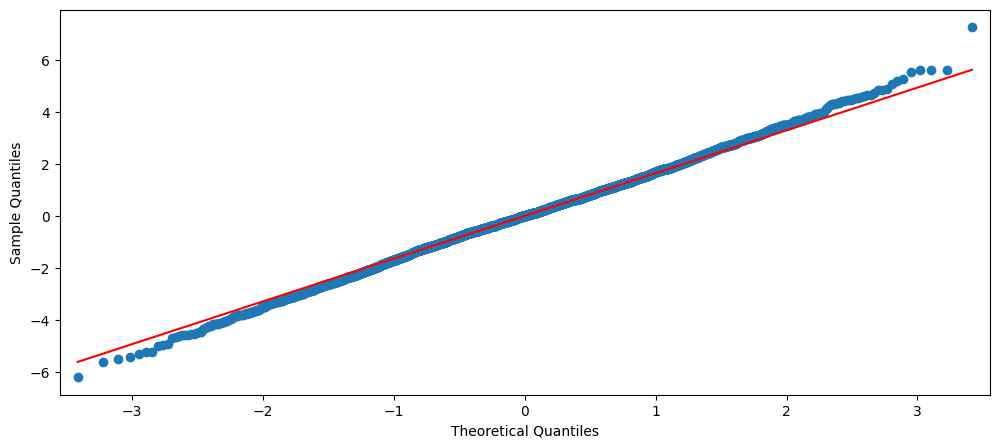

In [90]:
from statsmodels.graphics.gofplots import qqplot
qqplot(model.resid, line='q');

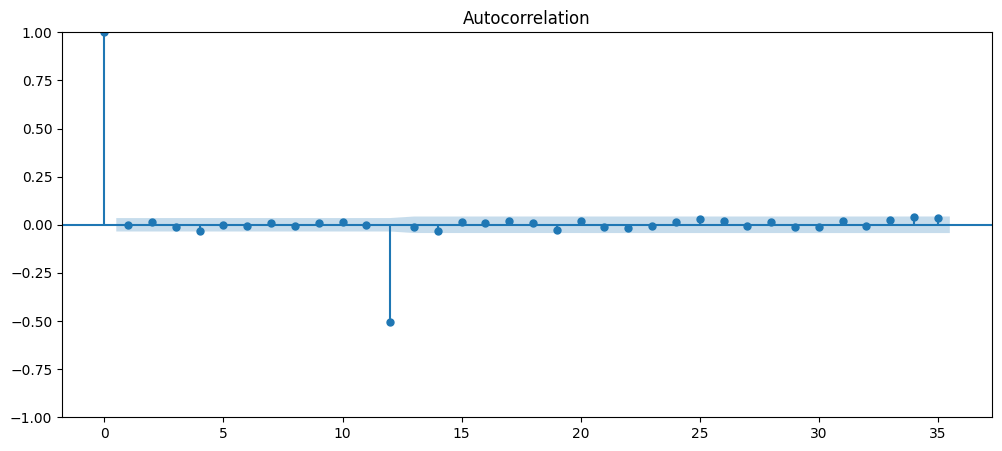

In [91]:
plot_acf(model.resid);plt.show()

Según los dos primeros gráficos, parece que se aprecia bastante normalidad tanto en los datos como en los residuos del modelo, sin embargo, algunos de los test de hipótesis indican lo contrario. Podemos llegar a decir que no nos encontraremos con un mal modelo, ya que lo más probable es que al tener tanta cantidad de datos, algún test de normalidad falle debido a la varianza. Y según el último gráfico, parece que se haya arreglado la estacionalidad con la diferenciación de grado 1, aunque en el periodo 12 es cuando existe la autocorrelación.

Ahora vamos a comprobar si existe homoscedasticity: varianza estable en la variable predicha por el modelo.
Utilizaremos dos métodos:

het_breuschpagan: Breusch-Pagan Lagrange Multiplier test.
het_white: White’s Lagrange.

In [92]:
from statsmodels.stats.api import (het_breuschpagan, 
                                   het_white)

In [93]:
def het_test(model, test=het_breuschpagan):
    lm, lm_pvalue, fvalue, f_pvalue = (
        het_breuschpagan(model.resid, 
                         add_constant(
                             model.fittedvalues)
                        ))
    
    return "Heteroskedastic" if f_pvalue < 0.05 else "Homoskedastic"

In [94]:
print(het_test(model, test=het_breuschpagan))
print(het_test(model, test=het_white))

Homoskedastic
Homoskedastic


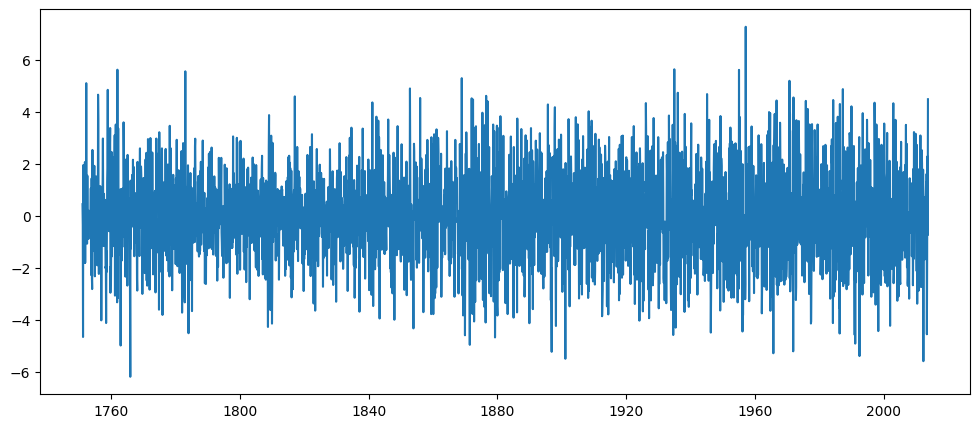

In [95]:
plt.plot(model.resid[1:])

Vemos que cumple con el supuesto de homocedasticidad. Por lo tanto no necesitamos realizar más transformaciones para mejorar los supuestos del modelo, ya que realizar más transformaciones implica perder información.

# **Modelo estadístico**

Para comenzar con la modelización debemos examinar los gráficos de ACF (autocorrelación) y PACF (autocorrelación parcial) para identificar posibles términos AR y MA en la serie temporal

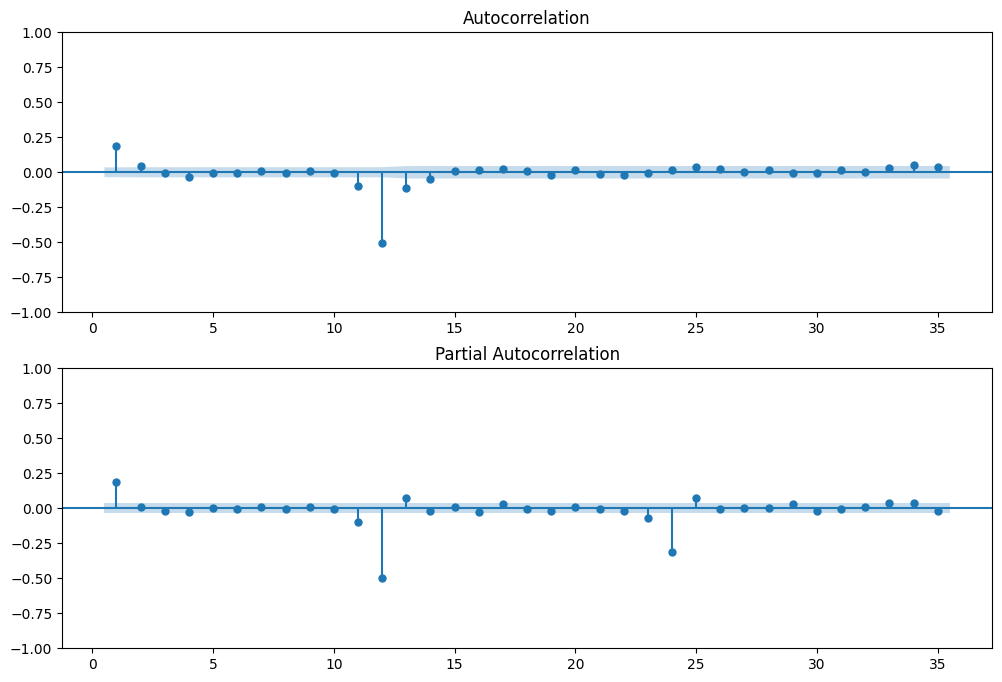

In [96]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
plot_acf(first_ord_diff, zero=False, ax=ax[0])
plot_pacf(first_ord_diff, zero=False, ax=ax[1])
#plt.savefig('images/fig_10.2.png', bbox_inches='tight', dpi=300)
plt.show()

ACF: pico en lag=1 (no estacional). pico en lag=12 (estacional porque coincide con periodo de estacionalidad)
Por tanto: MA(1) para el componente no estacional y MA(12) para el componente estacional.

PACF: caída gradual en los lags 12, 24, 36, y ligeramente en los 11, 13, 23 y 25. Estos últimos no implican gran importancia, ya que se debe a la misma componente estacional. Cómo se aprecia que no está relacionada con sus valores rezagados debemos considerar un AR(0)

Por tanto: ARIMA (0, 1, 1) + ARIMA (0, 1, 1, 12) -> (AR, DIFF, MA, (MA))

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from statsmodels.tsa.api import (kpss, adfuller, 
                                 seasonal_decompose, STL)
from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
import statsmodels as sm
from pathlib import Path
from statsmodels.tsa.arima.model import ARIMA


warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [12, 5]  

In [98]:
def split_data(data, test_split):
    l = len(data)
    t_idx = round(l*(1-test_split))
    train, test = data[ : t_idx], data[t_idx : ]
    print(f'train: {len(train)} , test: {len(test)}')
    return train, test

In [99]:
test_split = 0.15
tem_dfm_train, tem_dfm_test = split_data(tem_dfm, test_split)

train: 2690 , test: 475


In [100]:
train = tem_dfm_train.values.ravel()
y = tem_dfm_test.values.ravel()

In [101]:
model_arima = ARIMA(train, order=(0,1,12))
results = model_arima.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2690
Model:                ARIMA(0, 1, 12)   Log Likelihood               -5859.298
Date:                Mon, 29 Apr 2024   AIC                          11744.596
Time:                        13:28:53   BIC                          11821.257
Sample:                             0   HQIC                         11772.325
                               - 2690                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0174      0.019     -0.909      0.363      -0.055       0.020
ma.L2         -0.3442      0.017    -19.957      0.000      -0.378      -0.310
ma.L3         -0.6938      0.018    -37.531      0.000      -0.730      -0.658
ma.L4         -0.7547      0.022    -34.598      0.000      -0.797      -0.712
ma.L5         -0.3625      0.024    -15.033      0.000      -0.410      -0.315
ma.L6          0.1807      0.021      8.650      0.000       0.140       0.222
ma.L7          0.6023      0.021     29.009      0.000       0.562       0.643
ma.L8          0.6350      0.024     26.046      0.000       0.587       0.683
ma.L9          0.4013      0.022     18.044      0.000       0.358       0.445
ma.L10        -0.0406      0.018     -2.237      0.025      -0.076      -0.005
ma.L11        -0.2998      0.018    -16.415      0.000      -0.336      -0.264
ma.L12        -0.3023      0.018    -16.419      0.000      -0.338      -0.266
sigma2         4.5560      0.127     35.950      0.000       4.308       4.804
===================================================================================
Ljung-Box (L1) (Q):                   9.06   Jarque-Bera (JB):                 7.35
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               1.27   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Vamos a comparar el modelo con un Exponential smoothing.

In [102]:
from statsmodels.tsa.api import ExponentialSmoothing

In [103]:
exp_add = ExponentialSmoothing(train, 
                        seasonal = "add",
                        seasonal_periods = 12)

In [104]:
model_exp = exp_add.fit(use_brute=True, optimized=True)    

In [105]:
y_hat = model_exp.forecast(len(y))

In [106]:
print({'AIC':model_exp.aic,
      'BIC':model_exp.bic, 
      'AICc': model_exp.aicc,
      'RMSPE': rmspe(y, y_hat),
      'RMSE' : rmse(y, y_hat),
      'MAPE' : mape(y, y_hat),
      'model': model_exp})

{'AIC': 1112.3648210296712, 'BIC': 1194.9269716460137, 'AICc': 1112.5683376776324, 'RMSPE': 2.1355462166432186, 'RMSE': 1.7293542602201863, 'MAPE': 0.15366748544296943, 'model': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x000001B63CD71C70>}


In [107]:
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    endog   No. Observations:                 2690
Model:             ExponentialSmoothing   SSE                           4025.507
Optimized:                         True   AIC                           1112.365
Trend:                             None   BIC                           1194.927
Seasonal:                      Additive   AICC                          1112.568
Seasonal Periods:                    12   Date:                 Mon, 29 Apr 2024
Box-Cox:                          False   Time:                         13:28:53
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0290308                alpha                 True
smoothing_seasonal             0.000000                gamma                 True
initial_level                 11.513528                  l.0                 True
initial_seasons.0            -8.3900760                  s.0                 True
initial_seasons.1            -6.7193761                  s.1                 True
initial_seasons.2            -4.4881552                  s.2                 True
initial_seasons.3            -1.9898225                  s.3                 True
initial_seasons.4             1.8964588                  s.4                 True
initial_seasons.5             6.5487250                  s.5                 True
initial_seasons.6             9.9862699                  s.6                 True
initial_seasons.7             9.7086704                  s.7                 True
initial_seasons.8             5.6928439                  s.8                 True
initial_seasons.9             0.0310482                  s.9                 True
initial_seasons.10           -4.6884041                 s.10                 True
initial_seasons.11           -7.9431499                 s.11                 True
---------------------------------------------------------------------------------
"""

In [108]:
def plot_forecast(model, start, train, test):
    forecast = pd.DataFrame(model.forecast(test.shape[0]), 
                            index=test.index)
    ax = train.loc[start:].plot(style='--')
    test.plot(ax=ax)
    forecast.plot(ax=ax, style = '-.')
    ax.legend(['orig_train', 'orig_test', 'forecast'])
    # plt.show()
    return ax

<Axes: xlabel='dt'>

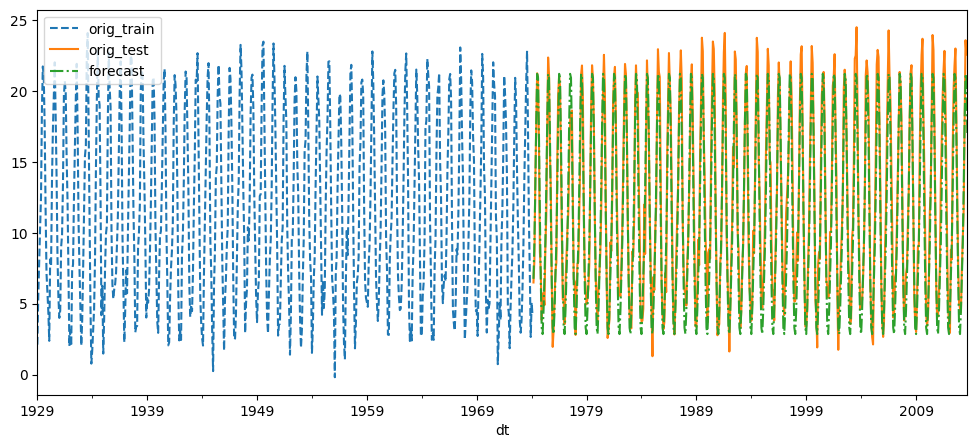

In [109]:
plot_forecast(model_exp, '1929', tem_dfm_train, tem_dfm_test)
# plt.savefig('images/fig_10.8.png', bbox_inches='tight', dpi=300)

Obtenemos unos resultados mucho mejores que con el modelo ARIMA comparando el AIC y BIC. También vemos que obtiene unas predicciones bastante razonables. Vamos a comparar conn un modelo SARIMAX a ver si conseguimos mejores resultados.

In [110]:
def combinator(items, r=1):
    combo = [i for i in product(*items, repeat=r)]
    return combo

In [111]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
plt.rcParams["figure.figsize"] = [14, 4]  

Ya habiamos hecho el anáisis de autocorrelación y autocorrelación parcial antes para saber los términos de AR y MA adecuados. Sin embargo, ahora vamos a utilizar un grid_search para obtener el mejor modelo posible variando los hiperparámetros del modelo.

In [112]:
%%time
P_ns, D_ns, Q_ns = [list(range(3))]*3
P_s, D_s, Q_s = [list(range(2))]*3

vals = combinator([P_ns, D_ns, Q_ns, P_s, D_s, Q_s])
score = {}
for i, (p, d, q, P, D, Q) in enumerate(vals):
    if i%15 == 0:
        print(f'Running model #{i} using SARIMA({p},{d},{q})({P},{D},{Q},12)')
    m = SARIMAX(tem_dfm_train, 
                order=(p,d,q),
                seasonal_order=(P, D, Q, 12),
                enforce_stationarity=False)
    res = m.fit(disp=0)
    y = tem_dfm_test.values.ravel() 
    y_hat = res.forecast(steps=len(y))
    score[i] = {'non-seasonal order': (p,d,q),
                'seasonal order': (P, D, Q),
                'AIC':res.aic, 
                'AICc': res.aicc,
                'BIC': res.bic,
                'RMSPE': rmspe(y, y_hat),
                'RMSE' : rmse(y, y_hat),
                'MAPE' : mape(y, y_hat),
                'model': res}

Running model #0 using SARIMA(0,0,0)(0,0,0,12)
Running model #15 using SARIMA(0,0,1)(1,1,1,12)
Running model #30 using SARIMA(0,1,0)(1,1,0,12)
Running model #45 using SARIMA(0,1,2)(1,0,1,12)
Running model #60 using SARIMA(0,2,1)(1,0,0,12)
Running model #75 using SARIMA(1,0,0)(0,1,1,12)
Running model #90 using SARIMA(1,0,2)(0,1,0,12)
Running model #105 using SARIMA(1,1,1)(0,0,1,12)
Running model #120 using SARIMA(1,2,0)(0,0,0,12)
Running model #135 using SARIMA(1,2,1)(1,1,1,12)
Running model #150 using SARIMA(2,0,0)(1,1,0,12)
Running model #165 using SARIMA(2,0,2)(1,0,1,12)
Running model #180 using SARIMA(2,1,1)(1,0,0,12)
Running model #195 using SARIMA(2,2,0)(0,1,1,12)
Running model #210 using SARIMA(2,2,2)(0,1,0,12)
CPU times: total: 14min 8s
Wall time: 14min 14s


In [113]:
def get_best_model(score, c='AIC'):
    initial_score = score[0][c]
    best_model = 0
    for k,v in score.items():
        if v[c] < initial_score:
            initial_score = v[c]
            best_model = k
    print(f'Best model: {best_model} with lowest {c} score: {initial_score}')
    return score[best_model]['model']

In [114]:
best_model = get_best_model(score, 'AIC')

Best model: 163 with lowest AIC score: 8614.825868252827


In [115]:
results = pd.DataFrame(score).T.sort_values(by='AIC').reset_index()
results.head(20)

index non-seasonal order seasonal order          AIC         AICc  \
0     163          (2, 0, 2)      (0, 1, 1)  8614.825868  8614.857495   
1      91          (1, 0, 2)      (0, 1, 1)  8616.073732  8616.096313   
2     167          (2, 0, 2)      (1, 1, 1)  8618.281284  8618.323469   
3     187          (2, 1, 2)      (0, 1, 1)   8619.50316  8619.534799   
4     107          (1, 1, 1)      (0, 1, 1)  8622.399787  8622.414836   
5     115          (1, 1, 2)      (0, 1, 1)   8622.80861    8622.8312   
6      43          (0, 1, 2)      (0, 1, 1)    8623.3207  8623.335754   
7     191          (2, 1, 2)      (1, 1, 1)  8623.391267  8623.433468   
8     111          (1, 1, 1)      (1, 1, 1)  8624.398922  8624.421504   
9     179          (2, 1, 1)      (0, 1, 1)  8624.399622  8624.422204   
10     47          (0, 1, 2)      (1, 1, 1)  8625.320482  8625.343072   
11    183          (2, 1, 1)      (1, 1, 1)  8628.116018  8628.147645   
12    119          (1, 1, 2)      (1, 1, 1)  8629.271567  8629.303205   
13    155          (2, 0, 1)      (0, 1, 1)  8629.856006   8629.87858   
14     95          (1, 0, 2)      (1, 1, 1)  8630.961529  8630.993156   
15     19          (0, 0, 2)      (0, 1, 1)  8631.251941   8631.26699   
16     83          (1, 0, 1)      (0, 1, 1)  8631.776569  8631.791613   
17     75          (1, 0, 0)      (0, 1, 1)  8631.782735  8631.791754   
18    159          (2, 0, 1)      (1, 1, 1)  8632.409568  8632.441182   
19     23          (0, 0, 2)      (1, 1, 1)  8633.169102  8633.191684   

            BIC     RMSPE      RMSE      MAPE  \
0    8650.14912  2.108567  1.633377  0.144794   
1   8645.509775  2.109582  1.649329  0.146583   
2   8659.491744  2.109712  1.629966  0.144475   
3   8654.824158  2.126787  1.719064  0.151235   
4   8645.948621  2.124459  1.712593  0.150766   
5   8652.242775  2.123879  1.710917  0.150642   
6   8646.868032  2.130007   1.72899  0.152083   
7   8664.599098   2.13051  1.729597  0.151924   
8   8653.834965  2.124432  1.712511  0.150761   
9   8653.835665   2.12444  1.712531  0.150762   
10  8654.754647  2.129996  1.728958  0.152081   
11   8663.43927  2.128131  1.718466  0.152017   
12  8664.592565  2.123753  1.694807  0.150716   
13  8659.293927  2.117784  1.613991  0.143149   
14  8666.284781   2.11441  1.620846  0.143702   
15  8654.800775   2.11699  1.614772  0.143224   
16  8655.326906  2.116334  1.616128  0.143339   
17  8649.446613  2.116886  1.615041  0.143241   
18  8667.735072  2.117415  1.614503  0.143193   
19  8662.605145  2.116891   1.61494  0.143237   

                                                model  
0   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
1   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
2   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
3   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
4   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
5   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
6   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
7   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
8   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
9   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
10  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
11  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
12  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
13  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
14  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
15  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
16  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
17  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
18  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
19  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...

In [116]:
results = pd.DataFrame(score).T.sort_values(by='BIC').reset_index()
results.head(20)

index non-seasonal order seasonal order          AIC         AICc  \
0      91          (1, 0, 2)      (0, 1, 1)  8616.073732  8616.096313   
1     107          (1, 1, 1)      (0, 1, 1)  8622.399787  8622.414836   
2      43          (0, 1, 2)      (0, 1, 1)    8623.3207  8623.335754   
3      75          (1, 0, 0)      (0, 1, 1)  8631.782735  8631.791754   
4     163          (2, 0, 2)      (0, 1, 1)  8614.825868  8614.857495   
5     115          (1, 1, 2)      (0, 1, 1)   8622.80861    8622.8312   
6     111          (1, 1, 1)      (1, 1, 1)  8624.398922  8624.421504   
7     179          (2, 1, 1)      (0, 1, 1)  8624.399622  8624.422204   
8      47          (0, 1, 2)      (1, 1, 1)  8625.320482  8625.343072   
9      19          (0, 0, 2)      (0, 1, 1)  8631.251941   8631.26699   
10    187          (2, 1, 2)      (0, 1, 1)   8619.50316  8619.534799   
11     83          (1, 0, 1)      (0, 1, 1)  8631.776569  8631.791613   
12     11          (0, 0, 1)      (0, 1, 1)  8639.177805  8639.186827   
13     79          (1, 0, 0)      (1, 1, 1)  8633.768122   8633.78316   
14    147          (2, 0, 0)      (0, 1, 1)  8633.776268  8633.791305   
15    155          (2, 0, 1)      (0, 1, 1)  8629.856006   8629.87858   
16    167          (2, 0, 2)      (1, 1, 1)  8618.281284  8618.323469   
17     23          (0, 0, 2)      (1, 1, 1)  8633.169102  8633.191684   
18     87          (1, 0, 1)      (1, 1, 1)  8633.750171  8633.772745   
19    183          (2, 1, 1)      (1, 1, 1)  8628.116018  8628.147645   

            BIC     RMSPE      RMSE      MAPE  \
0   8645.509775  2.109582  1.649329  0.146583   
1   8645.948621  2.124459  1.712593  0.150766   
2   8646.868032  2.130007   1.72899  0.152083   
3   8649.446613  2.116886  1.615041  0.143241   
4    8650.14912  2.108567  1.633377  0.144794   
5   8652.242775  2.123879  1.710917  0.150642   
6   8653.834965  2.124432  1.712511  0.150761   
7   8653.835665   2.12444  1.712531  0.150762   
8   8654.754647  2.129996  1.728958  0.152081   
9   8654.800775   2.11699  1.614772  0.143224   
10  8654.824158  2.126787  1.719064  0.151235   
11  8655.326906  2.116334  1.616128  0.143339   
12  8656.840557  2.117797  1.613565  0.143107   
13   8657.31996   2.11684  1.615119  0.143247   
14  8657.328105  2.116884  1.615045  0.143242   
15  8659.293927  2.117784  1.613991  0.143149   
16  8659.491744  2.109712  1.629966  0.144475   
17  8662.605145  2.116891   1.61494  0.143237   
18  8663.188091  2.116331  1.616155  0.143341   
19   8663.43927  2.128131  1.718466  0.152017   

                                                model  
0   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
1   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
2   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
3   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
4   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
5   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
6   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
7   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
8   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
9   <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
10  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
11  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
12  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
13  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
14  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
15  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
16  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
17  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
18  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  
19  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...

In [117]:
score[163]

{'non-seasonal order': (2, 0, 2),
 'seasonal order': (0, 1, 1),
 'AIC': 8614.825868252827,
 'AICc': 8614.857494758851,
 'BIC': 8650.14911976771,
 'RMSPE': 2.1085666758419244,
 'RMSE': 1.6333773590579814,
 'MAPE': 0.1447935976494792,
 'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x1b643366030>}

<Axes: xlabel='dt'>

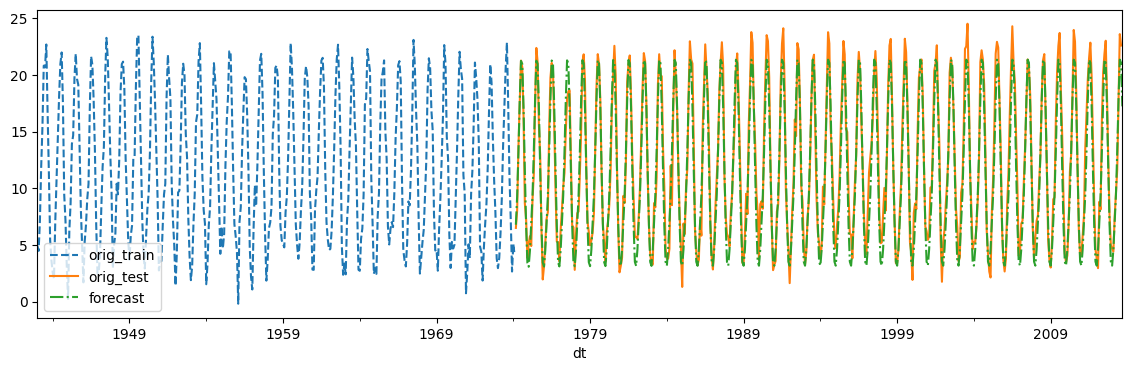

In [118]:
plot_forecast(best_model, '1943', tem_dfm_train, tem_dfm_test)
# plt.savefig('images/fig_10.25.png', bbox_inches='tight', dpi=300)

Obtenemos de igual forma unas predicciones muy razonables. Y aunque el modelo de exponential smoothing y este tengan una diferencia tan grande con el AIC o BIC, tienen unos valores de error practicamente iguales, por lo que ambos modelos sería igualmente aceptables.

# Modelo basado en machine learning 
Una vez obtenido estos modelos, vamos a ir un paso más adelantes, tratando de mejorar el modelo con algoritmos de machine learning.

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [120]:
import sktime
import statsmodels as sm
import matplotlib 
import sklearn

print(f'''
sktime ->  {sktime.__version__}
Matplotlib -> {matplotlib.__version__}
pandas -> {pd.__version__}   
numpy -> {np.__version__}
sklearn -> {sklearn.__version__}
statsmodels -> {sm.__version__}
''')


sktime ->  0.28.1
Matplotlib -> 3.8.4
pandas -> 2.2.2   
numpy -> 1.26.4
sklearn -> 1.4.2
statsmodels -> 0.14.2



Ya tenemos casi toda la preparación previa de datos, tan solo sería tener en cuenta aquí las ventanas deslizantes como variables de entrada.

In [121]:
tem_copy = tem_dfm.copy()


In [122]:
def split_data(df, test_split=0.10):
    n = int(len(df) * test_split)
    train, test = df[:-n], df[-n:]
    return train, test

In [123]:
train, test = split_data(tem_copy)
print(f'Train: {len(train)} Test: {len(test)}')

Train: 2849 Test: 316


In [124]:
train.head(3)

AverageTemperature
dt                            
1750-01-01               3.069
1750-02-01               5.838
1750-03-01               8.308

In [125]:
from sklearn.ensemble import (RandomForestRegressor, 
                              GradientBoostingRegressor, 
                              ExtraTreesRegressor)


from sklearn.linear_model import (LinearRegression, 
                                 Ridge, 
                                 HuberRegressor)
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.all import (
        Deseasonalizer, Detrender, 
        temporal_train_test_split,
        mean_absolute_percentage_error as mape, 
        mean_squared_percentage_error as mspe,
        mean_squared_error as mse, 
        ForecastingHorizon, 
        NaiveForecaster,
        TransformedTargetForecaster,
        PolynomialTrendForecaster
)
from sktime.forecasting.compose import make_reduction


Vamos a utilizar 15 ventanas deslizantes como nuevas variables, eliminando la estacionalidad de 15 periodos de forma aditiva.

In [126]:
def make_forecast(data, n, regressor, window=12):
    fh = ForecastingHorizon(np.arange(n) + 1, is_relative=True)
    forecaster = [
            ("deseasonalize", Deseasonalizer(sp=12, model="additive"))]
    if not isinstance(regressor, NaiveForecaster):
        reg = ("forecaster", make_reduction(
            regressor,
            strategy='recursive',
            window_length=window,
            scitype='tabular-regressor'))
        forecaster.append(reg)
        model = TransformedTargetForecaster(forecaster).fit(data.values)
        
    else:
        model = regressor.fit(data.values)
    
    predicted = pd.Series(
            model.predict(fh=fh).reshape(-1),
            index= test.index
                    )
    return predicted

In [127]:
regressors = {
    'Naive Forecaster' : NaiveForecaster(strategy='mean', sp=12),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(0.5),
    'Huber Regression': HuberRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'K-NN Regressor': KNeighborsRegressor(n_neighbors=6),
    'Extra Tree Regressor': ExtraTreesRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
            }

for k, reg in regressors.items():
    print(f'training {reg} ...')
    test[k] = make_forecast(train, len(test), regressor=reg , window=15)

In [128]:
test.shape

(316, 9)

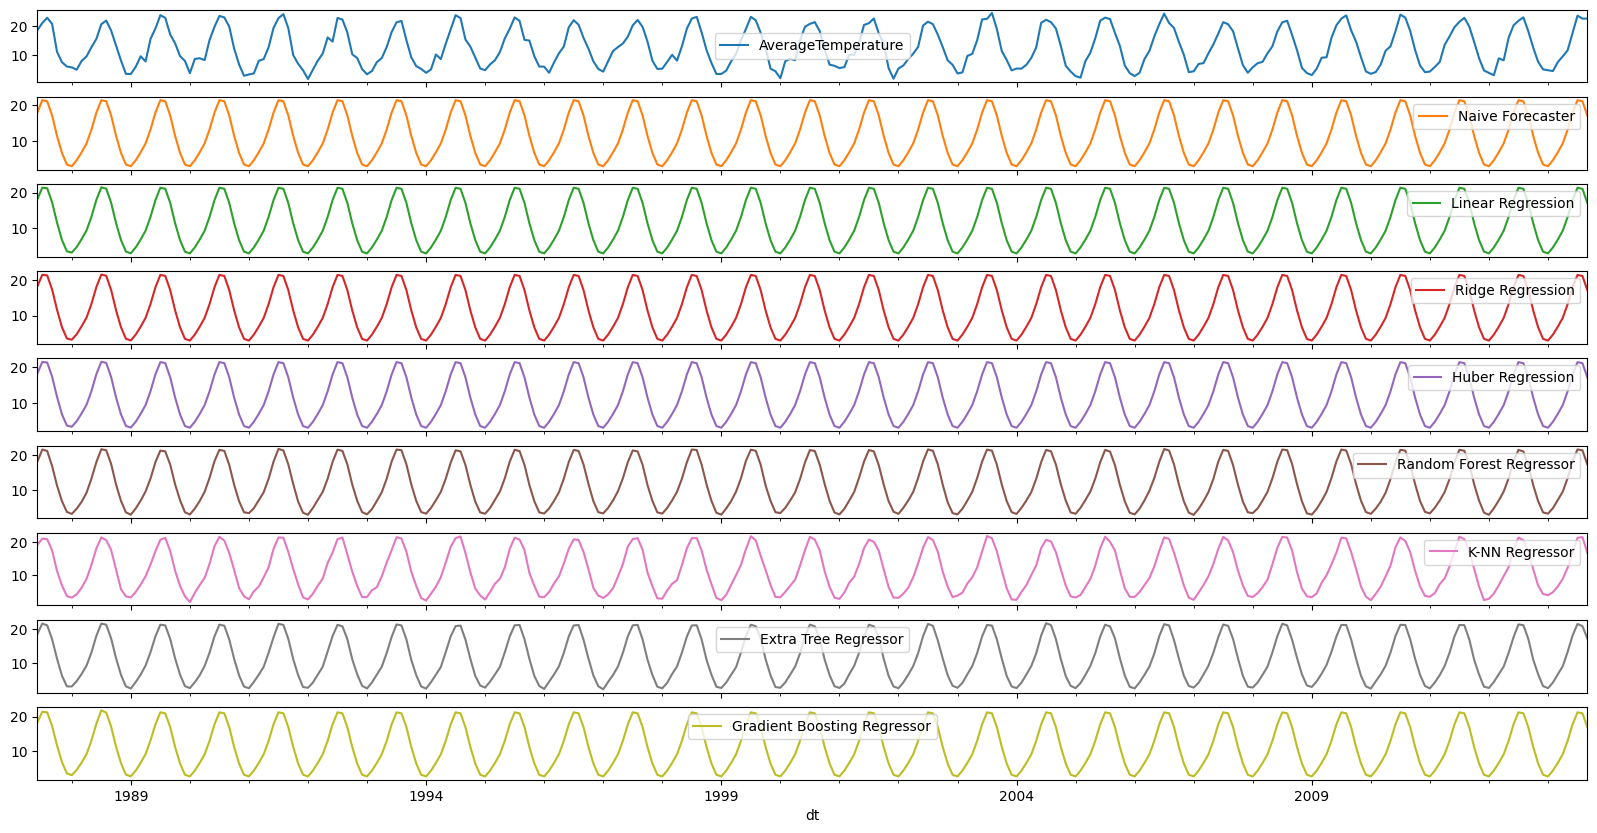

In [129]:
test.plot(subplots=True, figsize=(20, 10));plt.show()

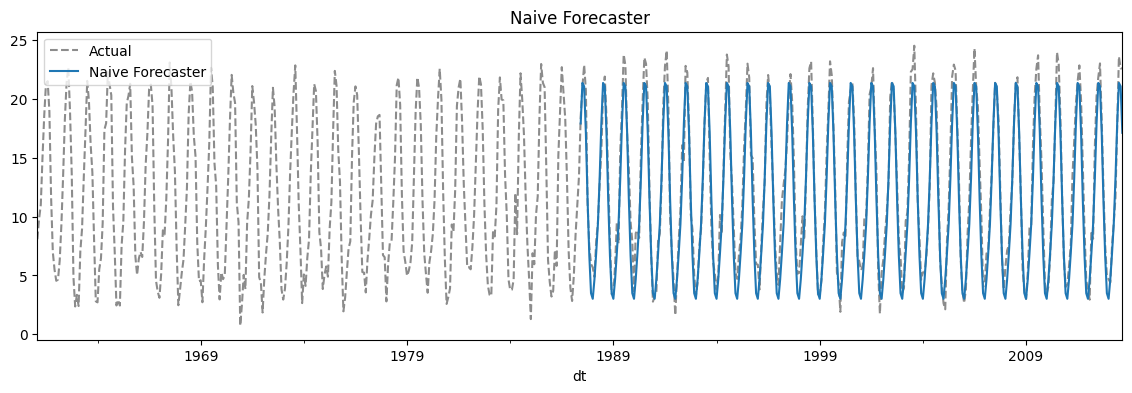

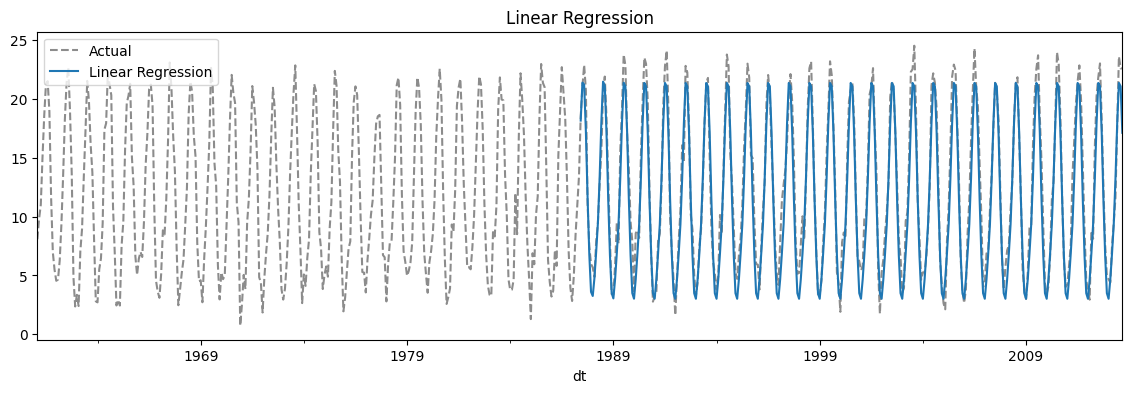

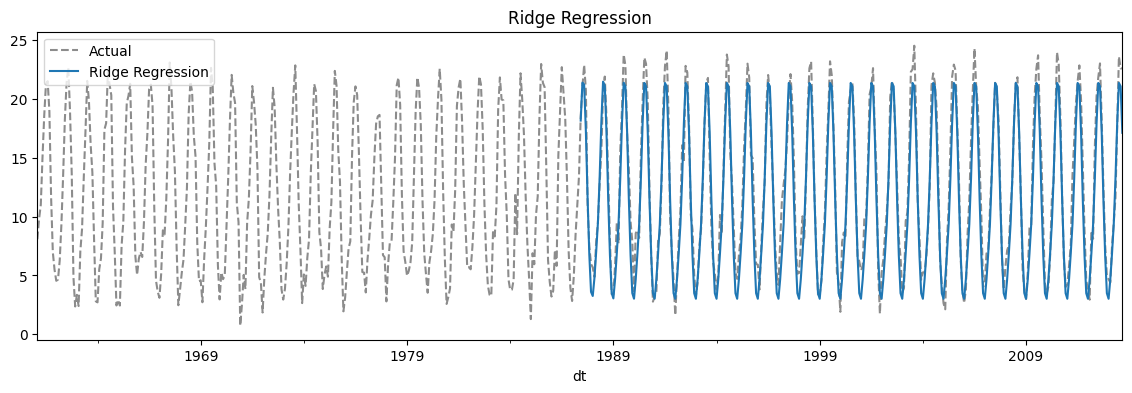

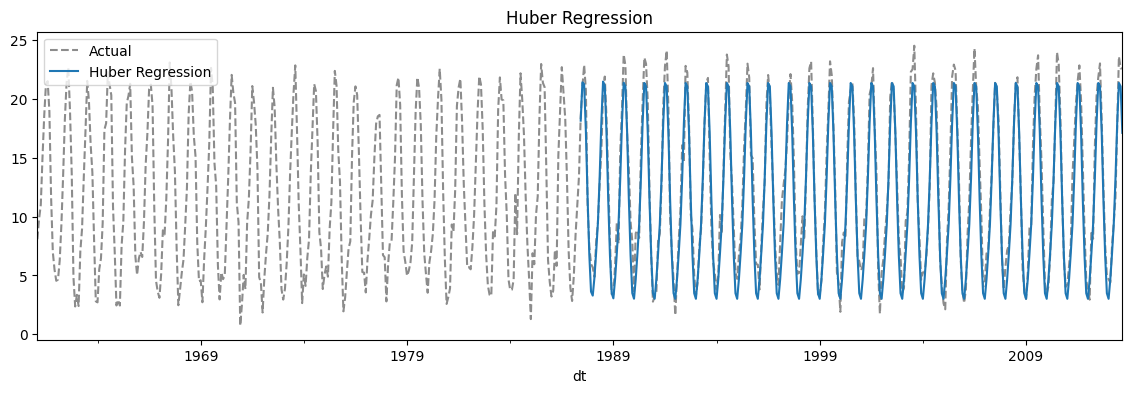

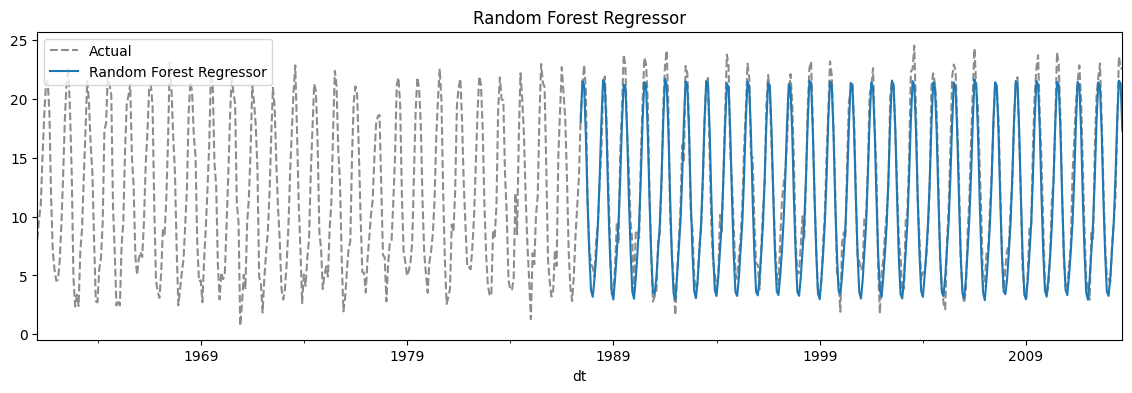

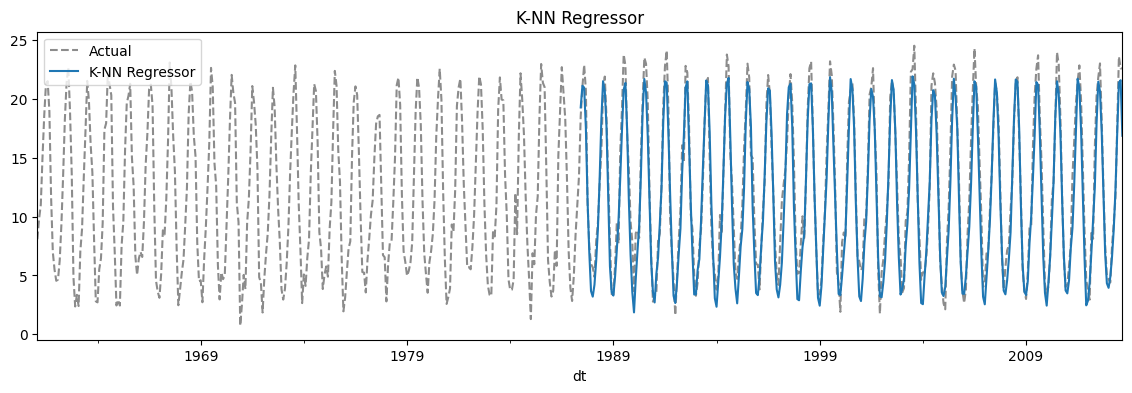

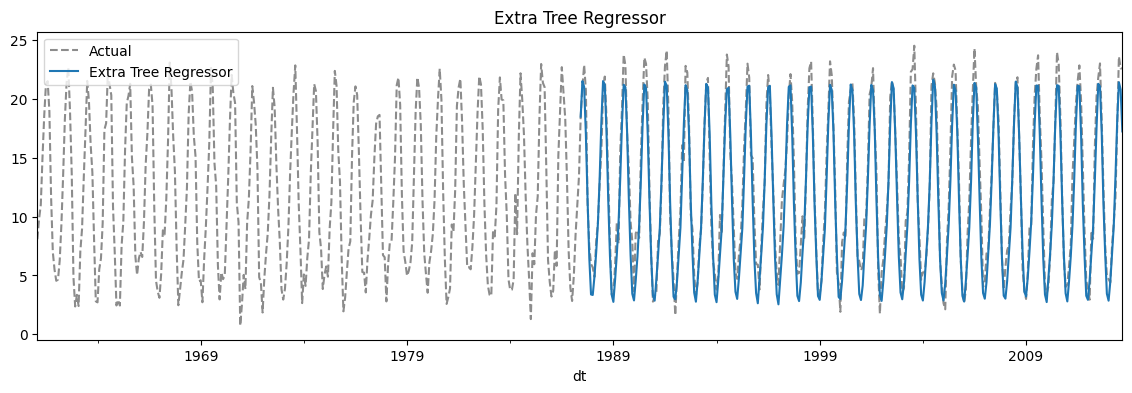

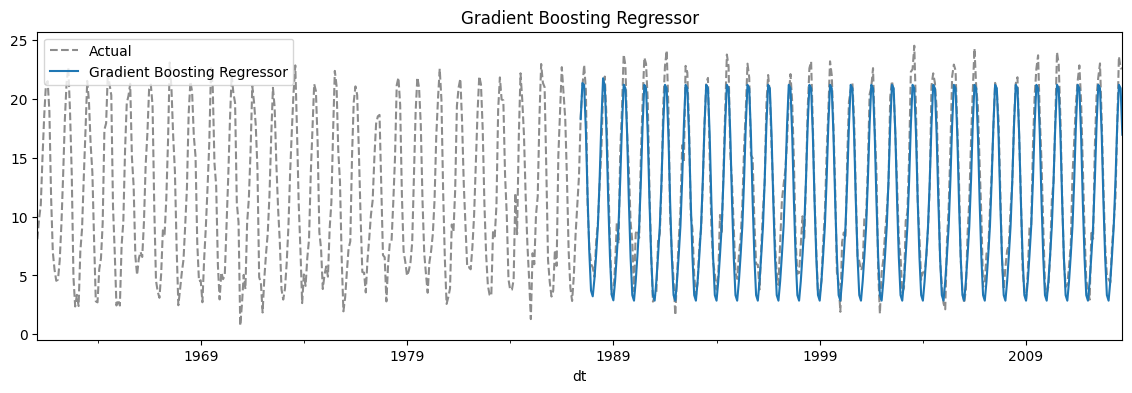

In [130]:
for i in test.iloc[: , 1:]:
    ax = tem_copy[-2*len(test):].plot(style='k--', alpha=0.45, title=i)
    test[i].plot(ax=ax)
    plt.legend(['Actual', i])
    plt.show()

Vemos que obtenemos predicciones muy similares en todos los algoritmos. 

In [131]:
def evaluate(df, train, sort_by='MAPE'):
    evals = pd.DataFrame(index=['sMAPE', 'MAPE', 'RMSE'])
    y_truth = df['AverageTemperature']
    y_predicted = df.drop(columns=['AverageTemperature'])
    for p in y_predicted:
        evals.loc['sMAPE', p] = mape(y_truth, y_predicted[p], symmetric=True)
        evals.loc['MAPE', p] = mape(y_truth, y_predicted[p], symmetric=False)
        evals.loc['RMSE', p] = np.sqrt(mse(y_truth, y_predicted[p]))
    return evals.T.sort_values(by=sort_by)
    

In [132]:
test

AverageTemperature  Naive Forecaster  Linear Regression  \
dt                                                                    
1987-06-01              18.534         17.917595          18.160918   
1987-07-01              21.048         21.363135          21.386084   
1987-08-01              22.890         21.069388          21.227147   
1987-09-01              20.756         17.122844          17.283713   
1987-10-01              11.095         11.438059          11.624078   
...                        ...               ...                ...   
2013-05-01              11.629         13.221840          13.220063   
2013-06-01              17.565         17.917595          17.919560   
2013-07-01              23.605         21.363135          21.362382   
2013-08-01              22.599         21.069388          21.068829   
2013-09-01              22.599         17.122844          17.122415   

            Ridge Regression  Huber Regression  Random Forest Regressor  \
dt                                                                        
1987-06-01         18.160898         18.154305                18.047043   
1987-07-01         21.386091         21.412262                21.518474   
1987-08-01         21.227142         21.253011                21.128130   
1987-09-01         17.283700         17.300135                16.820259   
1987-10-01         11.624062         11.640019                11.257060   
...                      ...               ...                      ...   
2013-05-01         13.220063         13.216620                13.411226   
2013-06-01         17.919560         17.916117                18.136220   
2013-07-01         21.362382         21.358940                21.560038   
2013-08-01         21.068829         21.065387                21.308216   
2013-09-01         17.122415         17.118972                17.303036   

            K-NN Regressor  Extra Tree Regressor  Gradient Boosting Regressor  
dt                                                                             
1987-06-01       19.279448             18.494924                    18.283051  
1987-07-01       21.117623             21.515885                    21.350037  
1987-08-01       20.966757             21.034402                    21.197869  
1987-09-01       17.548469             17.001064                    17.294454  
1987-10-01       11.312045             11.401083                    11.744906  
...                    ...                   ...                          ...  
2013-05-01       12.283152             13.384723                    13.059180  
2013-06-01       17.047707             18.103380                    17.758677  
2013-07-01       21.379271             21.416672                    21.201500  
2013-08-01       21.592626             20.801574                    20.907947  
2013-09-01       16.870047             17.243412                    16.961532  

[316 rows x 9 columns]

In [133]:
evaluate(test, train)

sMAPE      MAPE      RMSE
Random Forest Regressor      0.151565  0.143887  1.675295
Linear Regression            0.158819  0.147955  1.733200
Ridge Regression             0.158819  0.147955  1.733200
Huber Regression             0.158941  0.148019  1.734546
Naive Forecaster             0.159329  0.148319  1.736011
Extra Tree Regressor         0.167425  0.153245  1.803405
K-NN Regressor               0.168042  0.154263  1.789644
Gradient Boosting Regressor  0.170058  0.155160  1.828523

Parece que el Random Forest es el que mejor ha funcionado, aunque no hay mucha diferencia con otros. Además, se ha obtenido mejor RMSE con el modelo SARIMAX y menor MAPE, pero muy poca diferencia. Podemos probar a optimizar los hiperparámetros del modelo con Random Forest para mejorar los resultados.

In [134]:
from sktime.forecasting.all import (
        ForecastingGridSearchCV, 
        SlidingWindowSplitter,
        MeanAbsolutePercentageError)

Visualizamos los hiperparámetros que podemos optimizar y entrenamos el modelo con los hiperparámetros que seleccionemos para optimizarlos.

In [164]:
train, test = split_data(tem_copy)

In [165]:
test.shape

(316, 1)

In [166]:
n = len(test)
fh = ForecastingHorizon(np.arange(n) + 1, is_relative=True)
forecaster = TransformedTargetForecaster(
    [("deseasonalize", Deseasonalizer(model="additive", sp=12)),
     ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
     ("forecast",
            make_reduction(
                RandomForestRegressor(),
                scitype="tabular-regressor",
                window_length=15,
                strategy="recursive",
            ), ),  ])

In [167]:
forecaster.fit(train.values)
test['RF-Regressor'] = forecaster.predict(fh)

In [168]:
test.head()

AverageTemperature  RF-Regressor
dt                                          
1987-06-01              18.534     17.966290
1987-07-01              21.048     21.394445
1987-08-01              22.890     21.330900
1987-09-01              20.756     17.263653
1987-10-01              11.095     11.453125

In [169]:
forecaster.get_params()

{'steps': [('deseasonalize', Deseasonalizer(sp=12)),
  ('detrend', Detrender(forecaster=PolynomialTrendForecaster())),
  ('forecast',
   RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor(),
                                        window_length=15))],
 'deseasonalize': Deseasonalizer(sp=12),
 'detrend': Detrender(forecaster=PolynomialTrendForecaster()),
 'forecast': RecursiveTabularRegressionForecaster(estimator=RandomForestRegressor(),
                                      window_length=15),
 'deseasonalize__model': 'additive',
 'deseasonalize__sp': 12,
 'detrend__forecaster': PolynomialTrendForecaster(),
 'detrend__model': 'additive',
 'detrend__forecaster__degree': 1,
 'detrend__forecaster__regressor': None,
 'detrend__forecaster__with_intercept': True,
 'forecast__estimator': RandomForestRegressor(),
 'forecast__pooling': 'local',
 'forecast__transformers': None,
 'forecast__window_length': 15,
 'forecast__estimator__bootstrap': True,
 'forecast__estimator__ccp_al

In [174]:
hyperparams_grid = {
    "forecast__estimator__max_depth": [i for i in range(3,11)],
    "deseasonalize__model": ['multiplicative', 'additive'],
    "forecast__estimator__max_leaf_nodes": [[i for i in range(1,5)]]
}


In [199]:
cv = SlidingWindowSplitter(window_length=10, start_with_window=True)
smape = MeanAbsolutePercentageError(symmetric=True)

grid_csv = ForecastingGridSearchCV(
    forecaster, 
    strategy="refit", 
    cv = cv,
    param_grid=hyperparams_grid, 
    scoring=smape,
    return_n_best_forecasters=1,
    verbose=4
)

In [200]:
grid_csv.cv

SlidingWindowSplitter()

In [201]:
grid_csv.fit(train.values, fh=fh)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NAType'

He intentado de varias maneras y no encuentro ni el error, ni alguna manera alternativas sin que me salte un error por _get_flags. Es posible que con random forest no sea facil implementar esta técnica de grid search.

## modelo con redes neuronales

In [207]:
pip install tensorflow

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')
# plt.rc("figure", figsize=(16, 4))

In [2]:
tem = pd.read_csv("tem_dfm.csv")

In [3]:
import matplotlib 
import tensorflow as tf

print(f'''
Matplotlib -> {matplotlib.__version__}
pandas -> {pd.__version__}   
numpy -> {np.__version__}
tensorflow -> {tf.__version__}
''')


Matplotlib -> 3.8.4
pandas -> 2.2.2   
numpy -> 1.26.4
tensorflow -> 2.16.1



In [4]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [14, 7]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
plt.rc('font', size=8)                     ## 
plt.rc('axes', titlesize=16)               ## 
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ## 
#############################################

In [5]:
tem['dt'] = pd.to_datetime(tem['dt'])

# Configurar el índice del DataFrame como la columna de fechas
tem.set_index('dt', inplace=True)

In [6]:
def one_step_forecast(df, window):
    d = df.values
    x = []
    n = len(df)
    idx = df.index[:-window]
    for start in range(n-window):
        end = start + window
        x.append(d[start:end])
    cols = [f'x_{i}' for i in range(1, window+1)]
    x = np.array(x).reshape(n-window, -1)
    y = df.iloc[window:].values
    df_xs = pd.DataFrame(x, columns=cols, index=idx)
    df_y = pd.DataFrame(y.reshape(-1), columns=['y'], index=idx)
    return pd.concat([df_xs, df_y], axis=1).dropna()
    

In [7]:
tem_cp = tem.copy()

In [8]:
tem_a = one_step_forecast(tem_cp, 10)

In [9]:
tem_a.shape

(3155, 11)

In [10]:
class Standardize:
    def __init__(self, df, split=0.10):
        self.data = df
        self.split = split
    
    def split_data(self):
        n = int(len(self.data) * self.split)
        train, test = self.data.iloc[:-n], self.data.iloc[-n:]
        n = int(len(train) * self.split)
        train, val = train.iloc[:-n], train.iloc[-n:]
        assert len(test) + len(train) + len(val) == len(self.data)
        return train, test, val
    
    def _transform(self, data):
        data_s = (data - self.mu)/self.sigma
        return data_s
    
    def fit_transform(self):
        train, test, val = self.split_data()
        self.mu, self.sigma = train.mean(), train.std()
        train_s = self._transform(train)
        test_s = self._transform(test)
        val_s = self._transform(val)
        return train_s, test_s, val_s
    
    def inverse(self, data):
        return (data * self.sigma)+self.mu
        
    def inverse_y(self, data):
        return (data * self.sigma[-1])+self.mu[-1]

In [11]:
scale_tem = Standardize(tem_a)

train_tem, test_tem, val_tem = scale_tem.fit_transform()

In [12]:
len(train_tem)



2556

In [13]:
len(test_tem)

315

In [14]:
len(val_tem)

284

In [15]:
train_tem.head()

x_1       x_2       x_3       x_4       x_5       x_6  \
dt                                                                       
1750-01-01 -1.261093 -0.839089 -0.462306 -0.314407  0.350739  0.976120   
1750-02-01 -0.839055 -0.462615 -0.314494  0.350723  0.976095  1.797894   
1750-03-01 -0.462589 -0.314769  0.350663  0.976082  1.797864  1.546471   
1750-04-01 -0.314746  0.350538  0.976048  1.797856  1.546442  0.855589   
1750-05-01  0.350547  0.976064  1.797857  1.546433  0.855565 -0.277951   

                 x_7       x_8       x_9      x_10         y  
dt                                                            
1750-01-01  1.797967  1.546881  0.856089 -0.277781 -0.278031  
1750-02-01  1.546537  0.855871 -0.277820 -0.277781 -1.248260  
1750-03-01  0.855638 -0.277879 -0.277820 -1.248021 -1.193384  
1750-04-01 -0.277931 -0.277879 -1.248022 -1.193145 -1.268076  
1750-05-01 -0.277931 -1.247946 -1.193148 -1.267838 -0.476040

In [16]:
scale_tem.inverse(train_tem).head()

x_1     x_2     x_3     x_4     x_5     x_6     x_7     x_8  \
dt                                                                           
1750-01-01   3.069   5.838   8.308   9.278  13.643  17.747  23.140  21.490   
1750-02-01   5.838   8.308   9.278  13.643  17.747  23.140  21.490  16.956   
1750-03-01   8.308   9.278  13.643  17.747  23.140  21.490  16.956   9.517   
1750-04-01   9.278  13.643  17.747  23.140  21.490  16.956   9.517   9.517   
1750-05-01  13.643  17.747  23.140  21.490  16.956   9.517   9.517   3.152   

               x_9   x_10      y  
dt                                
1750-01-01  16.956  9.517  9.517  
1750-02-01   9.517  9.517  3.152  
1750-03-01   9.517  3.152  3.512  
1750-04-01   3.152  3.512  3.022  
1750-05-01   3.512  3.022  8.218

Comprobamos que se ha realizado la escala de forma correcta. Dividimos el dataset en variables independientes (X) y dependientes (y)

In [17]:
def features_target_ts(*args):
    y = [col.pop('y').values.reshape(-1, 1) for col in args]
    x = [col.values.reshape(*col.shape, 1)
                   for col in args]
    return *y, *x

In [18]:
(y_train_tem, 
 y_val_tem, 
 y_test_tem, 
 x_train_tem, 
 x_val_tem, 
 x_test_tem) = features_target_ts(train_tem, 
                               val_tem, 
                               test_tem)

In [19]:
# Comprobamos que es un array 

type(x_train_tem)

numpy.ndarray

Ya podemos empezar con la modelización.

In [20]:
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from keras.layers import (BatchNormalization, Dense,  
                TimeDistributed, Bidirectional, 
                SimpleRNN, GRU, LSTM, Dropout)

Vamos a probar a realizar dos modelos distintos, una red neuronal recurrente simple, y una más compleja como LSTM, y compararlas. Como no partimos de un data set excesivamente grande, con una red de una capa oculta de 32 neuronas y una de drop out (0.2) debería ser suficiente.\
Además, utilizaremos el optimizador de ADAM que suele ser el más neutro y de los que mejor funcionan.

In [21]:
def create_model(train, units, dropout=0.2):
    model = keras.Sequential()
    model.add(SimpleRNN(units=units,
                        return_sequences=False,
                        input_shape=(train.shape[1], 
                                     train.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    
    return model

In [44]:
def train_model_ts(model, 
                x_train, y_train, x_val, y_val, 
                epochs=500, 
                patience=12, 
                batch_size=32):
    
    model.compile(optimizer='adam', 
                  loss='mean_squared_error', 
                  metrics=[RootMeanSquaredError(), 
                           MeanAbsoluteError()])
    
    es = keras.callbacks.EarlyStopping(
                    monitor="val_loss", 
                    min_delta=0, 
                    patience=patience)
    
    history = model.fit(x_train,y_train, 
              shuffle=False, epochs=epochs,
              batch_size=batch_size, 
              validation_data=(x_val, y_val),
              callbacks=[es], verbose=1)
    return history

In [24]:
def plot_forecast(model, x_test, y_test, index, history):
    fig, ax = plt.subplots(2, 1)
    (pd.Series(history.history['loss'])
                      .plot(style='k',alpha=0.50, title='Loss by Epoch',
                            ax = ax[0], label='loss'))
    (pd.Series(history.history['val_loss'])
                      .plot(style='k',ax=ax[0],label='val_loss'))
    ax[0].legend()
    predicted = model.predict(x_test)
    pd.Series(y_test.reshape(-1), 
              index=index).plot(style='k--', alpha=0.5, ax=ax[1], 
                                title='Forecast vs Actual',
                                label='actual')
    pd.Series(predicted.reshape(-1), 
              index=index).plot(
            style='k',label='Forecast', ax=ax[1])
    fig.tight_layout()
    ax[1].legend();plt.show()

In [45]:
model_a_simpleRNN = create_model(train=x_train_tem, units=32)

In [46]:
model_a_simpleRNN.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history_a_simpleRNN = train_model_ts(model_a_simpleRNN, x_train_tem, y_train_tem, x_val_tem, y_val_tem)

Epoch 1/500


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.7175 - mean_absolute_error: 0.7100 - root_mean_squared_error: 0.8379 - val_loss: 0.0911 - val_mean_absolute_error: 0.2449 - val_root_mean_squared_error: 0.3019
Epoch 2/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0922 - mean_absolute_error: 0.2398 - root_mean_squared_error: 0.3027 - val_loss: 0.0755 - val_mean_absolute_error: 0.2241 - val_root_mean_squared_error: 0.2749
Epoch 3/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0839 - mean_absolute_error: 0.2291 - root_mean_squared_error: 0.2892 - val_loss: 0.0705 - val_mean_absolute_error: 0.2157 - val_root_mean_squared_error: 0.2654
Epoch 4/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0799 - mean_absolute_error: 0.2239 - root_mean_squared_error: 0.2823 - val_loss: 0.0652 - val_mean_absolute_error: 0.2074 - val_root_mean_squared_error: 0.2553
Epoch 5/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0761 - mean_absolute_error: 0.2165 - root_mean_squared_error: 0.27

Vemos que con 29 epochs ya se detiene al no encontrar mejoras en las 12 anteriores epochs.

In [48]:
model_a_simpleRNN.evaluate(x=x_test_tem, y=y_test_tem)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0718 - mean_absolute_error: 0.2158 - root_mean_squared_error: 0.2678 


[0.06892760843038559, 0.26254066824913025, 0.20826439559459686]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


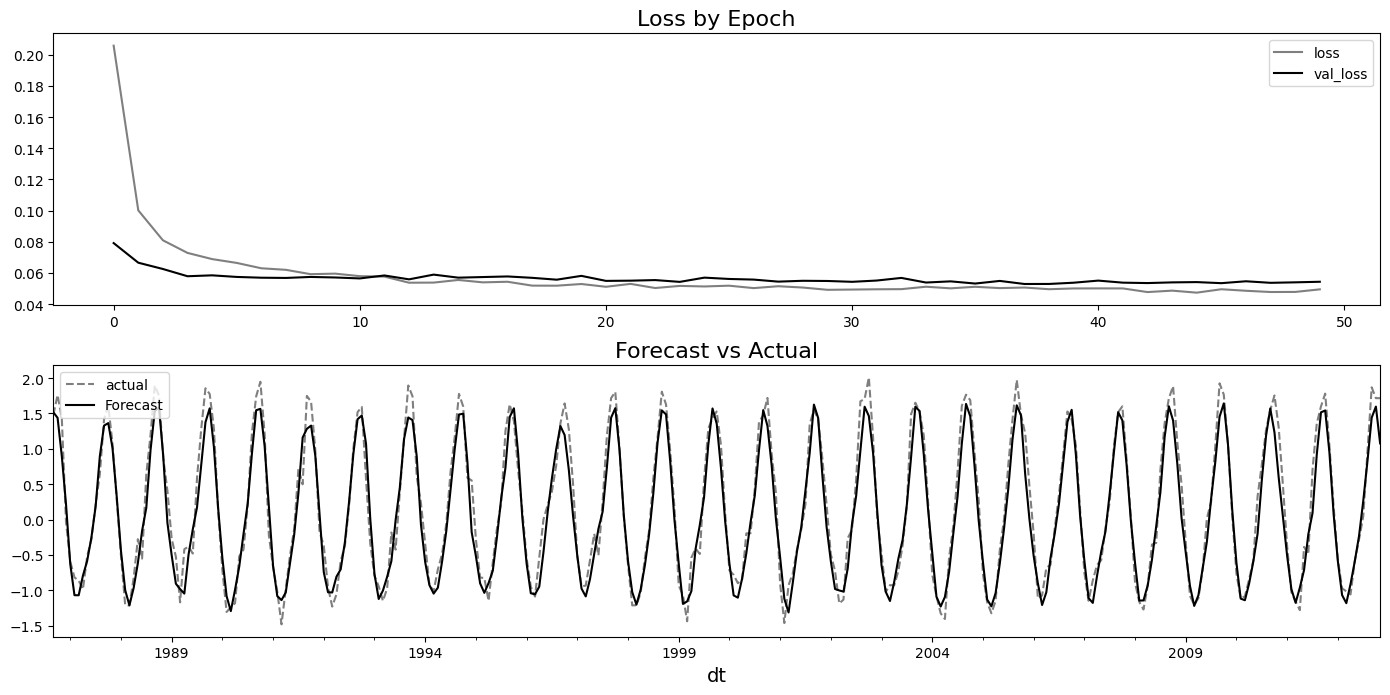

In [30]:
plot_forecast(model_a_simpleRNN, x_test_tem, y_test_tem, test_tem.index, history_a_simpleRNN)

Parecen unas predicciones bastante buenas. Vamos a probar ahora con un modelo algo más complejo pero con la misma arquitectura.

In [31]:
def create_model(train, units, dropout=0.2):
    model = keras.Sequential()
    model.add(LSTM(units=units,
                   input_shape=(train.shape[1], 
                                train.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    
    return model

In [32]:
model_a_lstm = create_model(train=x_train_tem, units=32)
model_a_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history_a_lstm = train_model_ts(model_a_lstm, x_train_tem, y_train_tem, x_val_tem, y_val_tem)

Epoch 1/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.7068 - mean_absolute_error: 0.7029 - root_mean_squared_error: 0.8308 - val_loss: 0.0957 - val_mean_absolute_error: 0.2487 - val_root_mean_squared_error: 0.3093
Epoch 2/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0964 - mean_absolute_error: 0.2443 - root_mean_squared_error: 0.3097 - val_loss: 0.0719 - val_mean_absolute_error: 0.2165 - val_root_mean_squared_error: 0.2681
Epoch 3/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0807 - mean_absolute_error: 0.2274 - root_mean_squared_error: 0.2839 - val_loss: 0.0648 - val_mean_absolute_error: 0.2055 - val_root_mean_squared_error: 0.2546
Epoch 4/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0737 - mean_absolute_error: 0.2150 - root_mean_squared_error: 0.2711 - val_loss: 0.0628 - val_mean_absolute_error: 0.2022 - val_root_mean_squared_error: 0.2506
Epoch 5/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0717 - mean_absolute_error: 0.2104 - root_mean_squared

In [34]:
model_a_lstm.evaluate(x=x_test_tem, y=y_test_tem)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0707 - mean_absolute_error: 0.2147 - root_mean_squared_error: 0.2659 


[0.06774341315031052, 0.260275661945343, 0.2063656747341156]

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


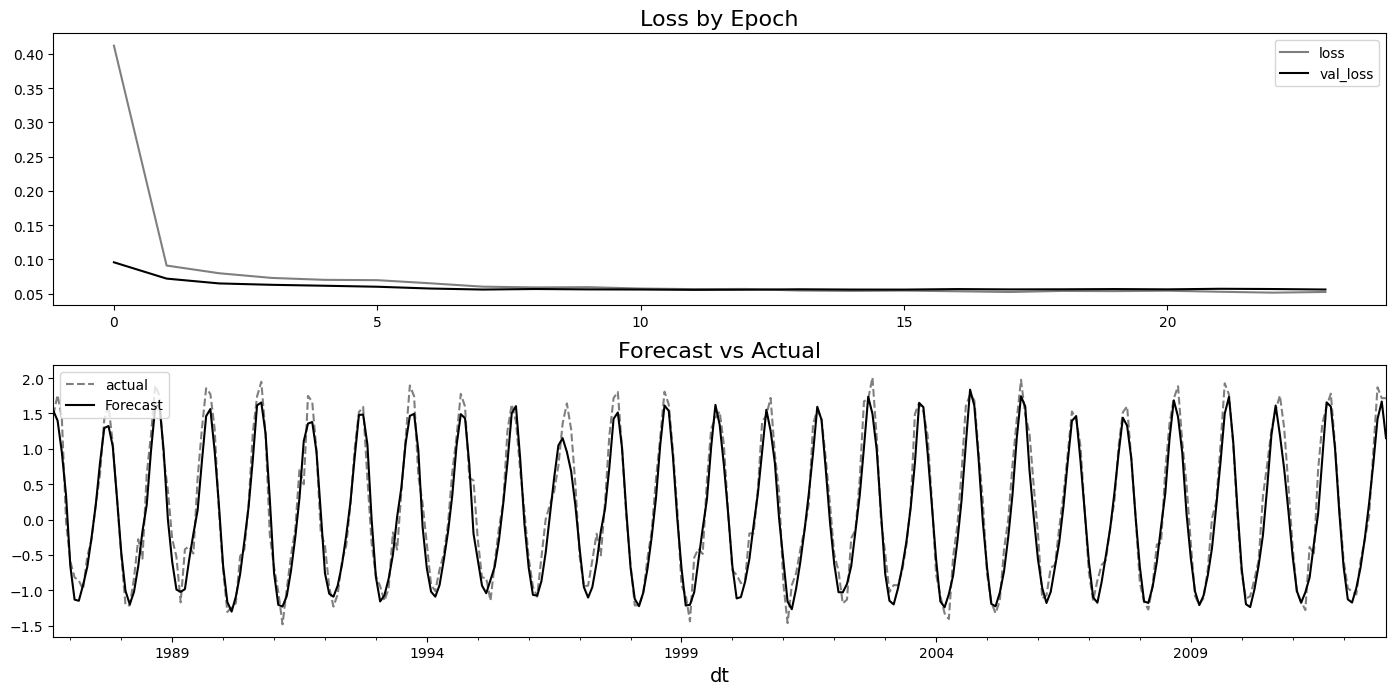

In [35]:
plot_forecast(model_a_lstm, x_test_tem, y_test_tem, test_tem.index, history_a_lstm)

Al final hemos obtenido los mismos errores que con la RNN pero habiendo entrenado menos epochs. Al ser un modelo con tanta monotonía, parece difícil obtener una diferenciacia sustancial.

A modo de comparativa, estos son los resultados de los mejores modelos obtenidos en cada uno de las técnicas aplicadas, entre modelos simples, modelos de machine learning, y modelos de deep learning.

- SARIMAX: \
RMSE: 1.6333 - MAPE: 0.1447

- Random Forest Regressor: \
sMAPE: 0.151565 - MAPE: 0.143887 - RMSE: 1.675295

- Modelo RNN simple: \
 loss: 0.0718 - MAE: 0.2158 - RMSE: 0.2678

Finalmente, podemos observar como con las redes neuronales obtenemos un error cuadrático medio muy inferior que en el resto de modelos.